# Before you do anything else, copy this file.

***Before you do anything else:* make a copy of this Colab notebook** (File -> Save a copy in Drive). Alternatively, click Download if you wish to run it locally (recommended only if you know Python). **Use your copy; you can't run anything in ours!**


# You don't need to know how to code to use this.

If you have any problems setting up or using GABRIEL, remember: ChatGPT is your friend!

Copy/paste any code and errors you are getting, and perhaps screenshot this notebook. Give all this to ChatGPT and it will probably be able to help. You can even ask ChatGPT to clean your data (upload a spreadsheet), do statistical analysis/make plots, or write code to turn of folder of text documents into a spreadsheet *and explain how you can run it*.

**With ChatGPT to aid you, you don't need to know how to code to use GABRIEL!** Any confusion, error, data format conversion, anything at all? Just ask: https://chatgpt.com/

# Overview

**Welcome to GABRIEL!**

The social sciences concern people and our behavior. Unfortunately, the vast majority of data we have on what people say and how we act is not in nicely tabulated spreadsheets of numbers. Almost all the data is *qualitative*. From diaries to legal codes, interviews to customer reviews, social media posts to advertising imagery, the data on who we are is locked in qualia, not accessible to rigorous, statistical, large scale analysis.

Until now. **With the new age of AI like ChatGPT, we have intelligence on tap**. We have *a tool that can comprehend text* enough to ace the SAT, better than any MTurker or human labeler out there. More importantly: it is extremely cheap, quick, and scalable.

An undergrad on a shoestring budget can analyze datasets that would previously cost millions in human labelling. Methods considered unthinkable five years ago, analyzing many thousands of text datapoints in extreme detail, is now pedestrian.

**The social sciences have now been opened up to an incredible amount of newly usable data, if we use these tools right.**

## What can you do with GABRIEL?

Here is a rundown of everything you can use GABRIEL for. Below, you can see fully explained examples, and step by step guides on using each capability on your own data.


*   **Classification** — the most common request we have received from professors is basic text classification to understand the frequency of different categories and to partition their data. Many social scientists realize ChatGPT can do this (and even manually paste each text datapoint into it for analysis), without knowing how to operate this at scale.
*   **Measuring attributes** — researchers often want to know how “optimistic” or “polite” a Facebook post is, or how “anti immigrant” or “supporting traditional gender roles” a political speech is. LLMs are already great at rating attributes in text, or even in entities (e.g. a historical technology) the LLM itself is very knowledgeable about, without text.
*   **Ranking by attributes** — sometimes researchers are most interested in the differences in an attribute across their dataset, and what that variance can explain. For example, a ranking of technologies by their iterativeness or of surveyants by their loneliness are powerful in understanding how those attributes matter. Unlike measuring attributes in a vacuum, ranking relies on repeated comparison amongst the datapoints, through which much more nuanced ELO ratings can be derived.
*   **Deidentification** — researchers commonly wish to remove personally identifiable information without distorting the text, so they can collaborate more easily. Current methods are rife with both false positives and negatives. Today’s LLMs are a dramatic improvement.
*   **Deduplication** — in large text datasets (e.g. scraped from Wikipedia or patents), near duplicates can pollute the final data. LLMs can remove these, at varying thresholds of similarity.
*   **Dataset merging** — a cursed occurrence in the research world is a dreaded merge between two tables with different index taxonomies (e.g. an occupational survey with BLS data, or census/patent taxonomies over time). LLMs make these imperfect mergers far less arduous, unifying the data world.
*   **Taxonomization** — in the vein of Anthropic’s Clio, creating an emergent taxonomy of a dataset can be valuable to segmenting the data and finding interesting buckets.
*   **Feature detection** — a holy grail of AI research tools is in finding novel features that matter in a given dataset. An example is taking one star and five star Glassdoor reviews, running many comparisons between them to find attributes which explain the difference, consolidating, and delving further into specifics for attributes which seem promising (e.g. “good benefits” becoming “spousal health insurance coverage”).
*   **Datapoint extraction** — often a researcher just needs a specific numerical datapoint, one that exists on the web but is not nicely tabulated in a spreadsheet. GPT with web searching can find specific dates of birth, years of invention, names of companies, and so on and put that disparate data into one quantitative spreadsheet.
*   **Synthetic data** — rewriting data prior to LLM analysis can help prevent “future bias” from infecting historical research (e.g. rewriting a Walmart earnings call to concern a similar but fabricated company). This comes up when an LLM’s knowledge of the future affects its analysis of the historical document. Another major opportunity of synthetic data is leveraging an LLMs tremendous world knowledge and ability to consolidate it all into one output (e.g. asking a model to describe the days in the life of different professions over time).
*   **Custom prompts** — while this might seem similar to a researcher simply using the GPT API for themselves, quite a lot of the work involved is not prompting but overhead. Parallelization of GPT calls, JSON output parsing, checkpointing, etc require a substantial time investment. Providing an opportunity for researchers to design their own prompts and output requirements without building the whole system would be valuable.



# Basic Setup

## Load the library by running the cell below.

**Let's start by loading the GABRIEL library**. Run the cell below. Just click the play button that appears on left side of the cell when you hover over it.

In [ ]:
%pip install \
  --force-reinstall \
  --no-deps \
  git+https://github.com/elliott-openai/GABRIEL-prerelease.git@main

In [ ]:
%pip install aiolimiter # run this too

## Setting up your OpenAI API key (to connect you to GPT).

To use GABRIEL, you'll need an OpenAI API key. This links GABRIEL to GPT in the cloud.

It is easy to set one up. **Start here: https://platform.openai.com/**.

Click the dropdown ">" on the left side of the cells below to see step by step instructions.

### Step 1: Sign up/log in to an OpenAI account.

If you do not have an OpenAI account yet, click "Sign up" and follow the steps to configure an account.

If you do have an existing account for OpenAI -- *like an existing account you use for ChatGPT, they are the same* -- click "Log in" and use the same credentials you usually use.

### Step 2. Get your API key and paste it below.

Once your account is set up, you can proceed to getting an actual API key. The key is a unique text identifier you will use to call the API, and it will be linked to your billing information.

Follow these steps to get your key.

#### First time setup.

1. On the top right corner of the OpenAI Platform website, **click "Start Building"**.

2. You should see a prompt to **"Create an Organization"**. Follow the steps there. You can call the organization "Personal" or "Default" or whatever you prefer.

3. After filling out the organization information, you should get to a popup that prompts you to create an API key. **Choose any key name and a project name** (the billing for your organization is by project, so you can keep track of how much you use per use case). **Click "Generate API key"**.

4. You should now see a long text starting with "sk-proj" and then lots of numbers (or something like that). It should look something like "sk-proj-a18ma718q..." with a jumble of numbers and letters. **COPY THIS KEY AND SAVE IT SOMEWHERE EASY TO ACCESS** (your password manager, a private note or document, a file on your computer). You will need to have this handy whenever you create a new code file, but you can't see the full key again. This is why you have to *copy and save it* now.

5. You should now see a screen to add credits. We strongly recommend you **add at least $5** to your account to fund some calls; your calls will fail if you have not added funds. This will move you to Usage Tier 1 (see below).

6. Verifying your account: **we strongly suggest you verify your account to gain access to top models** like the o4-mini and o3 reasoning models. To do this, click your profile at the top right, then on the left side panel, click "General" and you should see a Verifications tab with a place to "Verify your organization". You can also just follow this link: https://platform.openai.com/settings/organization/general.

#### Help! I didn't see the popup!

If you didn't see the popup to create a key directly, here is how you do it from the OpenAI platform homepage. No need to do this if you already have a key.

1. At the top right corner, click the little circle with your initial (e.g. "G" for Gabe or "H" for Hector).

2. Click *Your Profile* in the dropdown menu.

3. On the left hand side of the screen, click API Keys. Then, at the top, you should see a button to "Create a new secret key". Follow the steps and again, MAKE SURE TO SAVE THE KEY.

4. You can also add more funds or edit your billing information directly on the left hand side here (*Your Initial* in top left -> *Your Profile* in the dropdown -> *Billing* on the left hand side).

5. Verify your account like step 6 above.

#### Using non-OpenAI models.

*For advanced users, we have made it possible to use other model providers. This is not recommended unless you know what you are doing, as things might break and we have only tested and validated GABRIEL using OpenAI models.*

## Paste your API key here and run the cell.

Now, **paste your OpenAI key** -- the thing that looks like "sk-proj-a18ma718q..." you copied and saved -- into the below cell (inside the quotations!), replacing the placeholder string. Run this cell, which imports our package and sets up your key.

Ensure you already ran the first cell from above, to load GABRIEL!

In [ ]:
import gabriel
import os
import pandas as pd

os.environ['OPENAI_API_KEY'] = "<replace this with your API key, inside the quotation marks>"
# the above line should look something like os.environ['OPENAI_API_KEY'] = "sk-proj-a18ma718q..." but with your full API key

## We don't see your data. We don't store your data. We don't train on your data.

***Privacy note:***

Don't worry, **we can't see your data**. GABRIEL is just some code scaffold, run entirely on your machine. The OpenAI **GPT API does not retain data. It does not train on your data.** It processes your text, answers the query, and retains nothing. It is as privacy preserving as uploading a file to Dropbox or a secure Google Drive.

Like those other services, there are automated child abuse filters and related caveats. You can apply for true Zero Data Retention to skip even those filters, but this is overkill in essentially all cases. If you would feel comfortable uploading your data to a secure and enterprise compliant OneDrive or Google Drive folder, you should feel comfortable using the GPT API.

## If you opt in to data sharing, you get free credits. But by default, no data retention.

***Optional but highly recommended if your data is not sensitive:***

You can get quite a lot of free credits if you agree to share your usage data with OpenAI. If you opt in, this will amount to **several dollars in daily value, enough to analyze thousands of documents.**

This is totally optional and not required to use the library in any way. **By default, no data is stored -- this is purely opt in**, if you could use the free credits. You can also disable this later.

If you want to opt in:

1. Either follow a prompt on the platform homescreen to get free credits, on the bottom left, or

2. Click *Your Profile* (the circle with your initials) in the top right, then go to left hand panel and find the *Data Controls* tab. Under *Sharing*, you can enable various data sharing settings and you should see tabs under each that describe what credits you receive in each instance.

## Understanding rate limits, and how much money you should put in.

**Important:** there is one annoying complication with the GPT API. *Rate limits*.

Basically, to prevent fraud and abuse, OpenAI sets limits on new users. There are caps on words (tokens) per minute and requests per minute. This can slow your analysis.

**You can start with \$5:** ensure you have paid at least \$5 to be on Tier 1. Everything will run, but it will be quite slow.

**To make things a lot faster (recommended):** if you can, add \$100 to your account. 7 days after your first successful payment, you'll get Tier 3 for much faster analysis.

You can get started with just \$5 and get experimenting. For any large dataset (over 500 texts), you will want to be in Tier 3+. Large datasets will still work on Tier 1, but it will be much slower and you may run out of your $5 quickly.

To add money to your account, visit https://platform.openai.com/settings/organization/billing/.

To learn more about rate limits, visit https://platform.openai.com/docs/guides/rate-limits.

## Loading your data.

You can **skip this section for now and go straight to the actual GABRIEL functions below**, like rating attributes in text, classifying labels on text, etc. There are toy examples you can run and modify to get a feel for how things work. **Once you are comfortable, come back here to load your actual data for analysis.**

### Getting your data into spreadsheet format

### Option 1: Load and save data using Google Drive (recommended).

If you can get your data in a folder on Google Drive, you can load it directly into this file. Run the below cell to connect to your Drive, and follow the popup prompts (it might open a new window).

Google Drive is great because everything GABRIEL outputs will be automatically saved to the Drive folder you specify. This notebook will time out after a few hours, so this ensures your data is saved.

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Then, you can find the path to your csv spreadsheet file on Google Drive. On the left hand side menu on in this notebook, click the folder icon (below the key). You should then see a file tree of your Drive; keep clicking through folders until you find the right file you want to load. Once you have the right file, hover over it and click the button with three small circles for options, then click "copy path". Load the file from your path using pandas.

In [ ]:
df = pd.read_csv("<replace this with the path you copied, inside the quotation marks>")
# the above line should look something like df = pd.read_csv("/content/drive/folder/spreadsheet.csv")

You should be able to easily read your data into a Pandas DataFrame (which is Python's version of a spreadsheet) from a csv, an Excel file, etc. If you are having any trouble, ask a chatbot like ChatGPT for help in writing the right code. The end format we use as input to GABRIEL must be a **Pandas DataFrame**, not a list or other object.

Press play on the cell below to see your spreadsheet in DataFrame form.

In [ ]:
df

### Option 2: Upload data to this notebook specifically (or use locally on your computer).

There are two alternative ways to load data into the notebook.
1. Run the file locally. If you are comfortable with using Python locally, you can download this Colab notebook and run it as a Jupyter notebook on your computer. In that case, you would use the path to the file on your computer when reading in the Pandas object.
2. Temporarily upload a file to this notebook [NOT ADVISED]. You can also upload a file from your computer by clicking the folder icon on the left, then clicking the upload button (sheet and up arrow), which says "Upload to session storage". Then you can get the path to the file the same way as the Google Drive method above. The downside is this deletes files after a little while, so your files **will not be safe**. It's better to have your files directly on Google Drive and also save the results into Drive, not into the temporary storage as this auto-deletes when your session ends.

# Classifying text.

Among the most useful tasks GPT can do for you is classification. GPT is quite smart; it can comprehend text probably a lot better than your RA. More importantly, it can do it **very cheaply, at massive scale, and within minutes**. *It is extremely accurate* (and you can hand validate a sample to be sure!).

GABRIEL makes this really easy to do at scale. All you need to do is provide your data and the possible classes you want to label; the model does the rest.

The sky is the limit here. Massive text datasets -- think thousands of social media posts, speeches, news headlines, anything -- can be classified for a few bucks in a few minutes, with extremely high accuracy on whatever labels interest you.

But let's start simple, with the toy example below.

## Toy classification example

If you followed the instructions above on setting up your API key, you should be able to press play on the cell below and see the magic happen! This is an essentially costless call. We encourage you to experiment with the data, labels, and parameters!

In [ ]:
toy_data = pd.DataFrame({"text": [
    "I heard that the new president instituted a law on gun control.",
    "My dog decided to eat food at 3am.",
    "Congress passes amended budget for 2026",
    "Why are you so late for class today? Did your dog eat your homework?",
    "Local activists rally outside city hall demanding climate reform.",
    "Scientists discover new species of frog in the Amazon rainforest.",
    "Breaking: Supreme Court rules on landmark case affecting digital privacy.",
    "I just finished reading a book that completely changed how I think about economics."
]})

labels = {
    "discusses politics": "The text makes reference to political figures, institutions, or issues.",
    "news headline": "The text is written in the style of a journalistic news headline.",
    "discusses animals": "The text includes mention of animals, whether real or metaphorical.",
    "first person perspective": "The text is written from a personal point of view.",
    "focus is on gun control": "The text’s primary subject is gun control, firearm regulations, or related debates."
}

results = await gabriel.classify(
    toy_data,
    column_name="text",   # name of column with text to classify
    labels=labels,        # dictionary of label definitions, defined above
    save_dir="toy_classify",  # directory to save results, use a Google Drive folder (e.g. "/content/drive/folder") for permanent storage
    model="gpt-5-mini",       # GPT model used for classification
    n_runs=1,                 # number of classification passes per text
)

In [ ]:
results     # press play on this cell to see your results

text  discusses politics  \
0  I heard that the new president instituted a la...                True   
1                 My dog decided to eat food at 3am.               False   
2            Congress passes amended budget for 2026                True   
3  Why are you so late for class today? Did your ...               False   
4  Local activists rally outside city hall demand...                True   
5  Scientists discover new species of frog in the...               False   
6  Breaking: Supreme Court rules on landmark case...                True   
7  I just finished reading a book that completely...               False   

   news headline  discusses animals  first person perspective  \
0          False              False                      True   
1          False               True                      True   
2           True              False                     False   
3          False               True                     False   
4           True              False                     False   
5           True               True                     False   
6           True              False                     False   
7          False              False                      True   

   focus is on gun control  
0                     True  
1                    False  
2                    False  
3                    False  
4                    False  
5                    False  
6                    False  
7                    False

## Full example in action

We will start with a simple example of text classification to show how the package works. We will load a sample dataset which contains news headlines from four classes:
- sports
- world news
- business
- science and technology

Each observation in the data is just a news headline, and it has also been manually annotated by humans in the past. To start, let's use gabriel to get our own classifications of each headline.

1. Load the news headlines dataset.

In [ ]:
from datasets import load_dataset
news = load_dataset("wangrongsheng/ag_news")
news_headlines = news['train'].to_pandas().sample(30, random_state = 42)
news_headlines.head()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00001.parquet:   0%|          | 0.00/18.6M [00:00<?, ?B/s]

data/test-00000-of-00001.parquet:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/120000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/7600 [00:00<?, ? examples/s]

text  label
71787  BBC set for major shake-up, claims newspaper L...      2
67218  Marsh averts cash crunch Embattled insurance b...      2
54066  Jeter, Yankees Look to Take Control (AP) AP - ...      1
7168   Flying the Sun to Safety When the Genesis caps...      3
29618  Stocks Seen Flat as Nortel and Oil Weigh  NEW ...      2

In [ ]:
news_headlines['label'] = news_headlines['label'].map({2:'business',3:'sci/tech',0:'world',1:'sports'})

2. Define the calls to the gabriel model. We have loaded the data, now let's call the model to analyze it. We simply define the classes we want to extract in the *labels* dictionary, provide the additional guidance to only return one label (by default, there can be multiple) - then pass all the information into a *gabriel.classify* call.

In [ ]:
labels = {'world':'Headline primarily a politics / world headline',
          'sports':'The article from the headline is about sports',
          'sci/tech':'The headline is for an article about science or technology',
          'business':'The article is about business'}

additional_guidelines = 'Imperatively only pick one class for each article. Pick whichever is the most salient or important feature of the text.'

classifications = await gabriel.classify(news_headlines,
                                         column_name = 'text',
                                         labels = labels,
                                         model = 'gpt-4.1-mini',
                                         n_runs = 3,
                                         min_frequency = 0.6, #minimum proportion of runs labeled "True" for the aggregate to be True
                                         save_dir = 'article_classification',
                                         additional_instructions=additional_guidelines, reset_files = True)
classifications.head()


===== OpenAI API usage summary =====
Number of prompts: 90
Total input words: 31,968
Requests per minute: 500 – maximum API calls you can make each minute.
Tokens per minute: 200,000 – maximum input + output tokens allowed per minute.
Words per minute: 100,000 – approximate number of words you can process per minute (2 tokens ≈ 1 word).

Note: your organization also has a monthly usage cap based on your tier. See the usage tiers below for details.

Usage tiers:
  • Free: qualifies by User must be in an allowed geography; monthly quota $100 / month
  • Tier 1: qualifies by $5 paid; monthly quota $100 / month
  • Tier 2: qualifies by $50 paid and 7+ days since first payment; monthly quota $500 / month
  • Tier 3: qualifies by $100 paid and 7+ days since first payment; monthly quota $1 000 / month
  • Tier 4: qualifies by $250 paid and 14+ days since first payment; monthly quota $5 000 / month
  • Tier 5: qualifies by $1 000 paid and 30+ days since first payment; monthly quota $200 000 /

Processing prompts:   0%|          | 0/90 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/gabriel/utils/openai_utils.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, batch_df], ignore_index=True)


[Classify] Filled 30/30 unique texts.

=== Label coverage (non-null) ===
world                                                  : 100.00% (30/30)
sports                                                 : 100.00% (30/30)
sci/tech                                               : 100.00% (30/30)
business                                               : 100.00% (30/30)



text     label  world  sports  \
0  BBC set for major shake-up, claims newspaper L...  business  False   False   
1  Marsh averts cash crunch Embattled insurance b...  business  False   False   
2  Jeter, Yankees Look to Take Control (AP) AP - ...    sports  False    True   
3  Flying the Sun to Safety When the Genesis caps...  sci/tech  False   False   
4  Stocks Seen Flat as Nortel and Oil Weigh  NEW ...  business  False   False   

   sci/tech  business  
0     False      True  
1     False      True  
2     False     False  
3      True     False  
4     False      True

3. Analyze the results

In [ ]:
classifications

text     label  world  \
0   BBC set for major shake-up, claims newspaper L...  business  False   
1   Marsh averts cash crunch Embattled insurance b...  business  False   
2   Jeter, Yankees Look to Take Control (AP) AP - ...    sports  False   
3   Flying the Sun to Safety When the Genesis caps...  sci/tech  False   
4   Stocks Seen Flat as Nortel and Oil Weigh  NEW ...  business  False   
5   Inter Milan seeks redemption win against Juven...    sports  False   
6   Saudi Arabia cuts oil prices Oil prices eased ...  business  False   
7   Google Cuts Its IPO Price Range SAN JOSE, Cali...     world  False   
8   FOCUS: Santander Says HBOS Counterbid To Face ...  business  False   
9   HP Revises Cluster Plans HP (Quote, Chart) is ...  sci/tech  False   
10  Manugistics Fires Its President Manugistics Gr...  sci/tech  False   
11  US genocide charge is Bush election ploy - Sud...     world   True   
12  Netflix CEO Rates Blockbuster, Amazon Threats ...  sci/tech  False   
13  Fake goods tempting young adults Young people ...  sci/tech  False   
14  RealNetworks signs up Red Flag Linux Digital m...  sci/tech  False   
15  Stop croc water swimming: coroner THE public s...     world  False   
16  O'Brien Sues OSU for  #36;3.4 Million (AP) AP ...    sports  False   
17  Construction Spending Hits All-Time High WASHI...     world  False   
18  Hewitt Wins Long Island, Sends U.S. Open Warni...    sports  False   
19  Alaska Brown Bears Gather for Annual Salmon Fe...  sci/tech  False   
20  MLB Notebook: Johnson trade still in the works...    sports  False   
21  MSN #39;s download service expanding Microsoft...  sci/tech  False   
22  US Army to withhold portion of Halliburton pay...  business  False   
23  Geminid Meteor Shower Could Be Spectacular DEN...  sci/tech  False   
24  The U.S. Gives Mia Hamm a Golden Farewell  ATH...    sports  False   
25  US Considering Incentives for Iran Resigning I...     world   True   
26  In Our View: Sanctions not enough for Sudan Wh...     world   True   
27  Apex court permits night viewing of Taj Mahal:...     world   True   
28  Krispy Kreme #39;s hot streak cools The niche ...  business  False   
29  EU Wants to Cut Greenhouse Gases in Cars, Shoe...  sci/tech   True   

    sports  sci/tech  business  
0    False     False      True  
1    False     False      True  
2     True     False     False  
3    False      True     False  
4    False     False      True  
5     True     False     False  
6    False     False      True  
7    False     False      True  
8    False     False      True  
9    False      True     False  
10   False     False      True  
11   False     False     False  
12   False     False      True  
13   False     False      True  
14   False      True     False  
15   False     False     False  
16    True     False     False  
17   False     False      True  
18    True     False     False  
19   False     False     False  
20    True     False     False  
21   False     False      True  
22   False     False      True  
23   False      True     False  
24    True     False     False  
25   False     False     False  
26   False     False     False  
27   False     False     False  
28   False     False      True  
29   False     False     False

# Rating attributes on text.

While classification is great for subsetting big datasets and big picture understanding, it loses a lot of the nuance. It is just yes or no on a label, not "how much".

Rating attributes answers that "how much" question. Specify whatever attributes you are interested in quantifying and **get numbers on a 0-100 scale for each attribute, corresponding to how much the text manifests that attribute**. This preserves nuance, and is great for a regression.

For example, say you have a dataset of speeches. Your attributes might be "populism" or "critical of the supreme court" or "adversarial" or anything. You'll get a rating for each speech, on each attribute, 0 to 100.

Try out the toy example below. **We strongly recommend you also try out the "ranking attributes" method too** -- that ranking approach also generates ratings, but by comparing the text to each other rather that rating them abstractly, making it our preferred method. This ratings method works great though, and is faster and cheaper to run.

## Toy ratings example

In [ ]:
toy_data = pd.DataFrame({"text": [
    "Following last quarter’s review, I’m confident we can ship the analytics dashboard by Friday with the current headcount.",
    "I’m drowning in tickets; the build keeps failing and it’s wearing me down.",
    "Today’s walk by the bay shook off the fog in my head; I feel ready to try again.",
    "The rollout was mismanaged; we flagged the risk repeatedly and were summarily ignored.",
    "Preliminary analyses suggest the intervention achieved measurable improvements across key outcomes.",
    "My calendar is stacked, sleep is thin, but I think we can thread the needle if we cut scope.",
    "Let’s merge—benchmarks beat baseline and the regressions look contained.",
    "Honestly, I’m lost; nothing I do seems to move the needle and it’s exhausting.",
    "The exhibition balanced restraint with daring; a surprisingly confident curatorial voice."
]})

attributes = {
    "focus on work life": "How much the text centers on jobs, projects, deadlines, meetings, or professional goals (0 = not about work, 100 = entirely about work).",
    "optimism": "How positive and forward-looking the text feels (0 = pessimistic/hopeless, 100 = highly hopeful and upbeat).",
    "anger": "How much frustration, irritation, or hostility is expressed (0 = none, 100 = very angry).",
    "formality": "How formal, structured, and professional the language is (0 = very casual/slangy, 100 = highly formal/academic).",
    "confidence": "How self-assured the speaker sounds about claims or outcomes (0 = doubtful/uncertain, 100 = very certain/assertive).",
    "personal stress": "How strained, overwhelmed, or anxious the speaker sounds (0 = calm/relaxed, 100 = extremely stressed)."
}

results = await gabriel.rate(
    toy_data,
    column_name="text",       # name of column with text to rate
    attributes=attributes,    # attributes to score on 0–100 scale; defined above
    save_dir="toy_rate",      # directory to save results, use a Google Drive folder (e.g. "/content/drive/folder") for permanent storage
    model="gpt-5-mini",     # GPT model used for ratings
    n_runs=3                  # number of rating passes per text (higher = averaged over more ratings)
)


In [ ]:
results     # run this cell to see your results

text  focus on work life  \
0  Following last quarter’s review, I’m confident...           94.333333   
1  I’m drowning in tickets; the build keeps faili...           87.666667   
2  Today’s walk by the bay shook off the fog in m...            2.333333   
3  The rollout was mismanaged; we flagged the ris...           87.000000   
4  Preliminary analyses suggest the intervention ...           83.333333   
5  My calendar is stacked, sleep is thin, but I t...           90.333333   
6  Let’s merge—benchmarks beat baseline and the r...           93.666667   
7  Honestly, I’m lost; nothing I do seems to move...           42.666667   
8  The exhibition balanced restraint with daring;...           37.333333   

    optimism      anger  formality  confidence  personal stress  
0  74.000000   1.000000  63.000000   86.000000         9.333333  
1   8.333333  29.666667  11.666667   14.000000        87.666667  
2  71.666667   0.000000  15.333333   57.000000        35.333333  
3  10.666667  68.333333  55.666667   83.000000        51.000000  
4  63.666667   0.000000  71.333333   56.333333         2.666667  
5  52.666667   8.000000  29.333333   60.333333        66.333333  
6  69.666667   0.666667  34.666667   83.333333         6.333333  
7  12.333333  32.333333  14.000000   20.000000        81.666667  
8  59.666667   0.000000  57.666667   73.333333         1.000000

## Full ratings example

Our example will consist of analyzing US presidential speeches given at the State of the Union (SOTU). We will import a dataset containing every full SOTU throughout US history, and we will then quantify certain features of each one using our ratings pipeline. First, we'll process only snippets of the speeches for convenience - processing the full speeches, further below, is optional.

1. Load our dataset, which consists of the full text of all SOTUs.

In [ ]:
from datasets import load_dataset
speeches = load_dataset("jsulz/state-of-the-union-addresses")
ds = speeches['train'].to_pandas()

Now, let's create small snippets from each speech to make it shorter. We'll get a sample of 30 speeches and create short paragraph-length snippets from each of those.

Run the below cell verbatim. This just loads small text snippets from each speech to get smaller examples to run. *Target_words* sets the length of snippets - it is 500 words by default. **There is no need to change anything here.**

In [ ]:
import random
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import sent_tokenize, word_tokenize

# --- helpers ------------------------------------------------------

def strip_tags(html: str) -> str:
    """Return plain text with all tags removed."""
    return BeautifulSoup(html, "html.parser").get_text(" ", strip=True)

def sample_sentence_chunk(raw_html: str, target_words: int = 500) -> str:
    """
    Return a snippet that:
      • starts at a sentence boundary
      • ends at a sentence boundary
      • contains *at least* `target_words` words
    """
    text = strip_tags(raw_html)
    sentences = sent_tokenize(text)

    if not sentences:                       # defensive
        return ""

    word_counts = [len(word_tokenize(s)) for s in sentences]
    total_words = sum(word_counts)

    # If the whole speech is shorter than the budget, just return it.
    if total_words <= target_words:
        return text.strip()

    # Choose a random start sentence such that enough words remain.
    valid_starts = [
        i for i in range(len(sentences))
        if sum(word_counts[i:]) >= target_words
    ]
    start = random.choice(valid_starts)

    # Accumulate sentences until the budget is met or exceeded.
    words_so_far, end = 0, start
    while words_so_far < target_words and end < len(sentences):
        words_so_far += word_counts[end]
        end += 1

    snippet = " ".join(sentences[start:end])
    return snippet.strip()

# --- DataFrame wrapper --------------------------------------------

def get_snippets(df, html_col="speech_html", out_col="snippet",
                 target_words=500):
    """
    Add a column of sentence‑aligned snippets to `df`.
    """
    return df.assign(**{
        out_col: df[html_col].apply(
            lambda x: sample_sentence_chunk(x, target_words)
        )
    })

snippets = get_snippets(ds, html_col="speech_html", out_col="snippet",
                       target_words=500)

snippets_samp = snippets.sample(30)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


2. Define our features. Here, we are going to define the different features we want to measure in the texts. Each of these features will be given an individual numerical rating for each text. We create a dictionary containing the attribute names, and their definitions.

In [ ]:
SOTU_FEATURES = {
    "focus on foreign policy": "Scale of attention devoted to international affairs, foreign leaders, global crises, alliances, trade, or other non‑U.S. contexts. High ratings are given to speeches where foreign matters form a central, recurring theme and are framed as critical national priorities. Low ratings are given when international topics are mentioned only briefly or ceremonially and the speech overwhelmingly does not deal with these issues.",

    "populism": "Extent of use of people‑versus‑elite framing and anti‑establishment rhetoric that pits ‘ordinary citizens’ against political, media, or corporate power holders. High ratings are given to speeches rich in contrasts between ‘the people’ and ‘the elites,’ featuring direct attacks on entrenched interests and calls to overturn the status quo. Low ratings apply when the tone is institutional or conciliatory with little to no anti‑elite language.",

    "technocratic": "Degree of concrete policy detail—statistics, program mechanics, costs, timelines, agency names—versus broad value statements or slogans. High ratings are assigned when the speech supplies specific data points and implementation steps that signal expertise and pragmatism. Low ratings arise when policy ideas remain vague or rhetorical with few specifics.",

    "formality": "Extent to which the speech is highly formal as opposed to casual in style and rhetoric. High ratings correspond to highly formal style with a sophisticated lexicon and strict rhetorical structure, with no casual language. Low ratings correspond to an informal or casual style characterized by casual language, lack of rhetorical flourish or use of more common language and lexicon.",

    "concern about immigration": "Extent to which immigration is framed as a challenge, risk, or threat—border security, cultural impact, economic displacement, or calls for restriction. High ratings are given when immigration is portrayed as an urgent problem or danger, with strong language urging tighter enforcement or reduced inflows. Low ratings are given when immigration is depicted neutrally or positively as a source of strength and opportunity, or is scarcely addressed.",

    "selling the American dream": "Whether the speech ppeals to the narrative that anyone can achieve upward mobility through hard work and shared national values, often illustrated with personal success stories. High ratings are assigned when the speech repeatedly invokes ‘the American Dream’ and tells individual success anecdotes that underscore boundless opportunity. Low ratings apply when upward‑mobility rhetoric is minimal and the emphasis is on systemic barriers or collective action instead.",

    "optimistic about science and technology": "Whether the speech has a positive framing of scientific progress and technological innovation as engines of future prosperity, security, and leadership. High ratings are given to visionary optimism about breakthroughs (AI, space, energy, etc.) and promises of investment or national advantage through innovation. Low ratings occur when technology is mentioned sparingly, framed cautiously, or overshadowed by other concerns."
}


3. We rate each of our speech snippets along the above axes using a simple gabriel call. In the below cell, we specify the structure of our data, choose the model we want, and ask to run the analysis. Our files will be saved and we can then look at the numerical results.

In [ ]:
results = await gabriel.rate(df = snippets_samp, column_name = 'snippet', attributes = SOTU_FEATURES, save_dir = 'sotu_snippets',
                             model = 'gpt-4.1-nano')

4. Analysis. The ratings should now be merged back into our original dataframe. Look to the rightmost columns to see the results for our sample speeches and snippets.

In [ ]:
results

potus       date categories  \
0          George W. Bush 2005-02-02     Spoken   
1         Abraham Lincoln 1861-12-03    Written   
2           James K. Polk 1847-12-07    Written   
3      Theodore Roosevelt 1901-12-03    Written   
4           Ronald Reagan 1985-02-06     Spoken   
5   Franklin D. Roosevelt 1938-01-03     Spoken   
6        Ulysses S. Grant 1872-12-02    Written   
7            Barack Obama 2012-01-24     Spoken   
8           Ronald Reagan 1987-01-27     Spoken   
9            James Monroe 1817-12-02    Written   
10  Franklin D. Roosevelt 1934-01-03     Spoken   
11          Richard Nixon 1972-01-20    Written   
12         James Buchanan 1859-12-19    Written   
13         Harry S Truman 1950-01-04     Spoken   
14      Lyndon B. Johnson 1968-01-17     Spoken   
15       Martin van Buren 1838-12-03    Written   
16    Rutherford B. Hayes 1879-12-01    Written   
17       Grover Cleveland 1888-12-03    Written   
18    William Howard Taft 1912-12-03    Written   
19      Lyndon B. Johnson 1969-01-14     Spoken   
20     William J. Clinton 1998-01-27     Spoken   
21  Franklin D. Roosevelt 1935-01-04     Spoken   
22         Andrew Jackson 1835-12-08    Written   
23          James Madison 1814-09-20    Written   
24         Andrew Johnson 1867-12-03    Written   
25           Jimmy Carter 1979-01-25    Written   
26         George W. Bush 2006-01-31     Spoken   
27       William McKinley 1900-12-03    Written   
28      George Washington 1794-11-19     Spoken   
29      John Quincy Adams 1826-12-05    Written   

                                          speech_html  \
0   Mr. Speaker, Vice President Cheney, Members of...   
1   In the midst of unprecedented political troubl...   
2   The annual meeting of Congress is always an in...   
3   The Congress assembles this year under the sha...   
4   Mr. Speaker, Mr. President, distinguished Memb...   
5   Mr. President, Mr. Speaker, Members of the Sen...   
6   In transmitting to you this my fourth annual m...   
7   Mr. Speaker, Mr. Vice President, Members of Co...   
8   Mr. Speaker, Mr. President, distinguished Memb...   
9   At no period of our political existence had we...   
10  Mr. President, Mr. Speaker, Senators and Repre...   
11  To the Congress of the United States: It was j...   
12  Our deep and heartfelt gratitude is due to tha...   
13  Mr. President, Mr. Speaker, Members of the Con...   
14  [Delivered in person before a joint session at...   
15  I congratulate you on the favorable circumstan...   
16  The members of the Forty-sixth Congress have a...   
17  As you assemble for the discharge of the dutie...   
18    The foreign relations of the United States a...   
19  For the sixth and the last time, I present to ...   
20   Mr. Speaker, Mr. Vice President, Members of t...   
21  Mr. President, Mr. Speaker, Members of the Sen...   
22  In the discharge of my official duty the task ...   
23  Notwithstanding the early day which had been f...   
24  The continued disorganization of the Union, to...   
25  My State of the Union Address was devoted to w...   
26  Thank you all. Mr. Speaker, Vice President Che...   
27  At the outgoing of the old and the incoming of...   
28  \n When we call to mind the gracious indulgenc...   
29  The assemblage of the representatives of our U...   

                                      no-contractions  \
0   Mr. Speaker, Vice President Cheney, Members of...   
1   In the midst of unprecedented political troubl...   
2   The annual meeting of Congress is always an in...   
3   The Congress assembles this year under the sha...   
4   Mr. Speaker, Mr. President, distinguished Memb...   
5   Mr. President, Mr. Speaker, Members of the Sen...   
6   In transmitting to you this my fourth annual m...   
7   Mr. Speaker, Mr. Vice President, Members of Co...   
8   Mr. Speaker, Mr. President, distinguished Memb...   
9   At no period of our political existence had we...   
10  Mr. President, Mr. Speaker, Senators an

Done! That was all that was needed to get the numerical ratings for each text. We can make our calls more complicated - for instance by rating each text multiple times - but the basics are just as above.

### Larger-scale example on full SOTUs

### Setup of full run

As an additional example, we will run our attributes on the entirety of the SOTU speeches. Based on the below setup, this should cost about $0.30 to run.

No need to run this part of the analysis if your tier is too low or you are running into issues. You can look at the results.

In short, the approach here is exactly the same. We are just using the model to rate more, longer texts - but the structure is fundamentally unchanged.

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [ ]:
full_results = await gabriel.rate(df = ds, column_name = 'speech_html', attributes = SOTU_FEATURES, save_dir = 'sotu_full_ratings',
                             model = 'gpt-4.1-nano')


===== OpenAI API usage summary =====
Number of prompts: 245
Total input words: 2,309,152
Requests per minute: 30,000 – maximum API calls you can make each minute.
Tokens per minute: 150,000,000 – maximum input + output tokens allowed per minute.
Words per minute: 75,000,000 – approximate number of words you can process per minute (2 tokens ≈ 1 word).

Note: your organization also has a monthly usage cap based on your tier. See the usage tiers below for details.

Usage tiers:
  • Free: qualifies by User must be in an allowed geography; monthly quota $100 / month
  • Tier 1: qualifies by $5 paid; monthly quota $100 / month
  • Tier 2: qualifies by $50 paid and 7+ days since first payment; monthly quota $500 / month
  • Tier 3: qualifies by $100 paid and 7+ days since first payment; monthly quota $1 000 / month
  • Tier 4: qualifies by $250 paid and 14+ days since first payment; monthly quota $5 000 / month
  • Tier 5: qualifies by $1 000 paid and 30+ days since first payment; monthly qu

Processing prompts:   0%|          | 0/245 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/gabriel/utils/openai_utils.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, batch_df], ignore_index=True)


### Analysis

Now, we've gotten our outcome variables for each of the 200+ speeches in our original data. Let's now look at how the ratings have changed over time.

For the avoidance of doubt, this part of the notebook does not use gabriel - it just analyzes the results from gabriel to give you a sense of the types of basic use cases that could be made from data.

Below, we show both a smoothed timeseries plot across all presidents of our outcomes of interest - and a per-president mean of the ratings, in barplot format.

In [ ]:
full_results['year'] = full_results['date'].dt.year

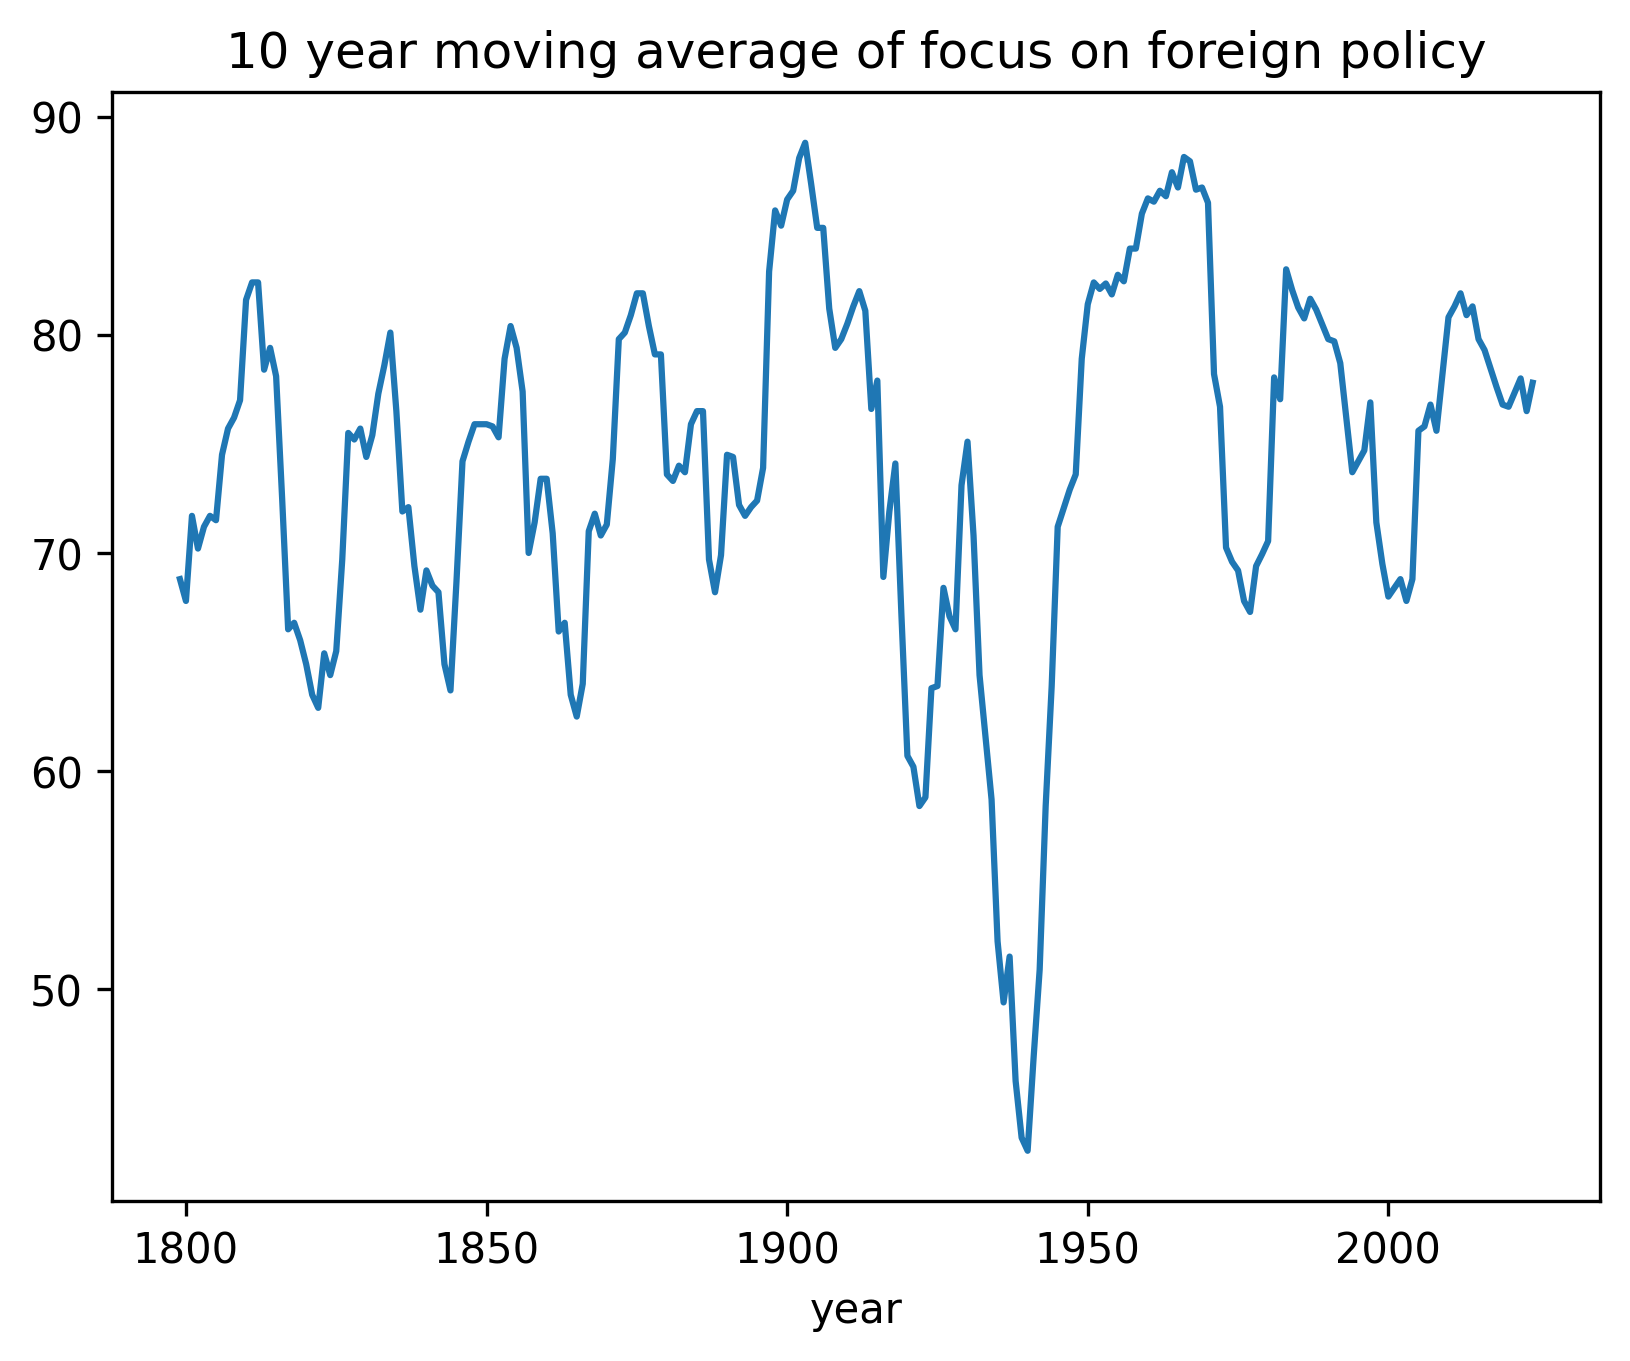

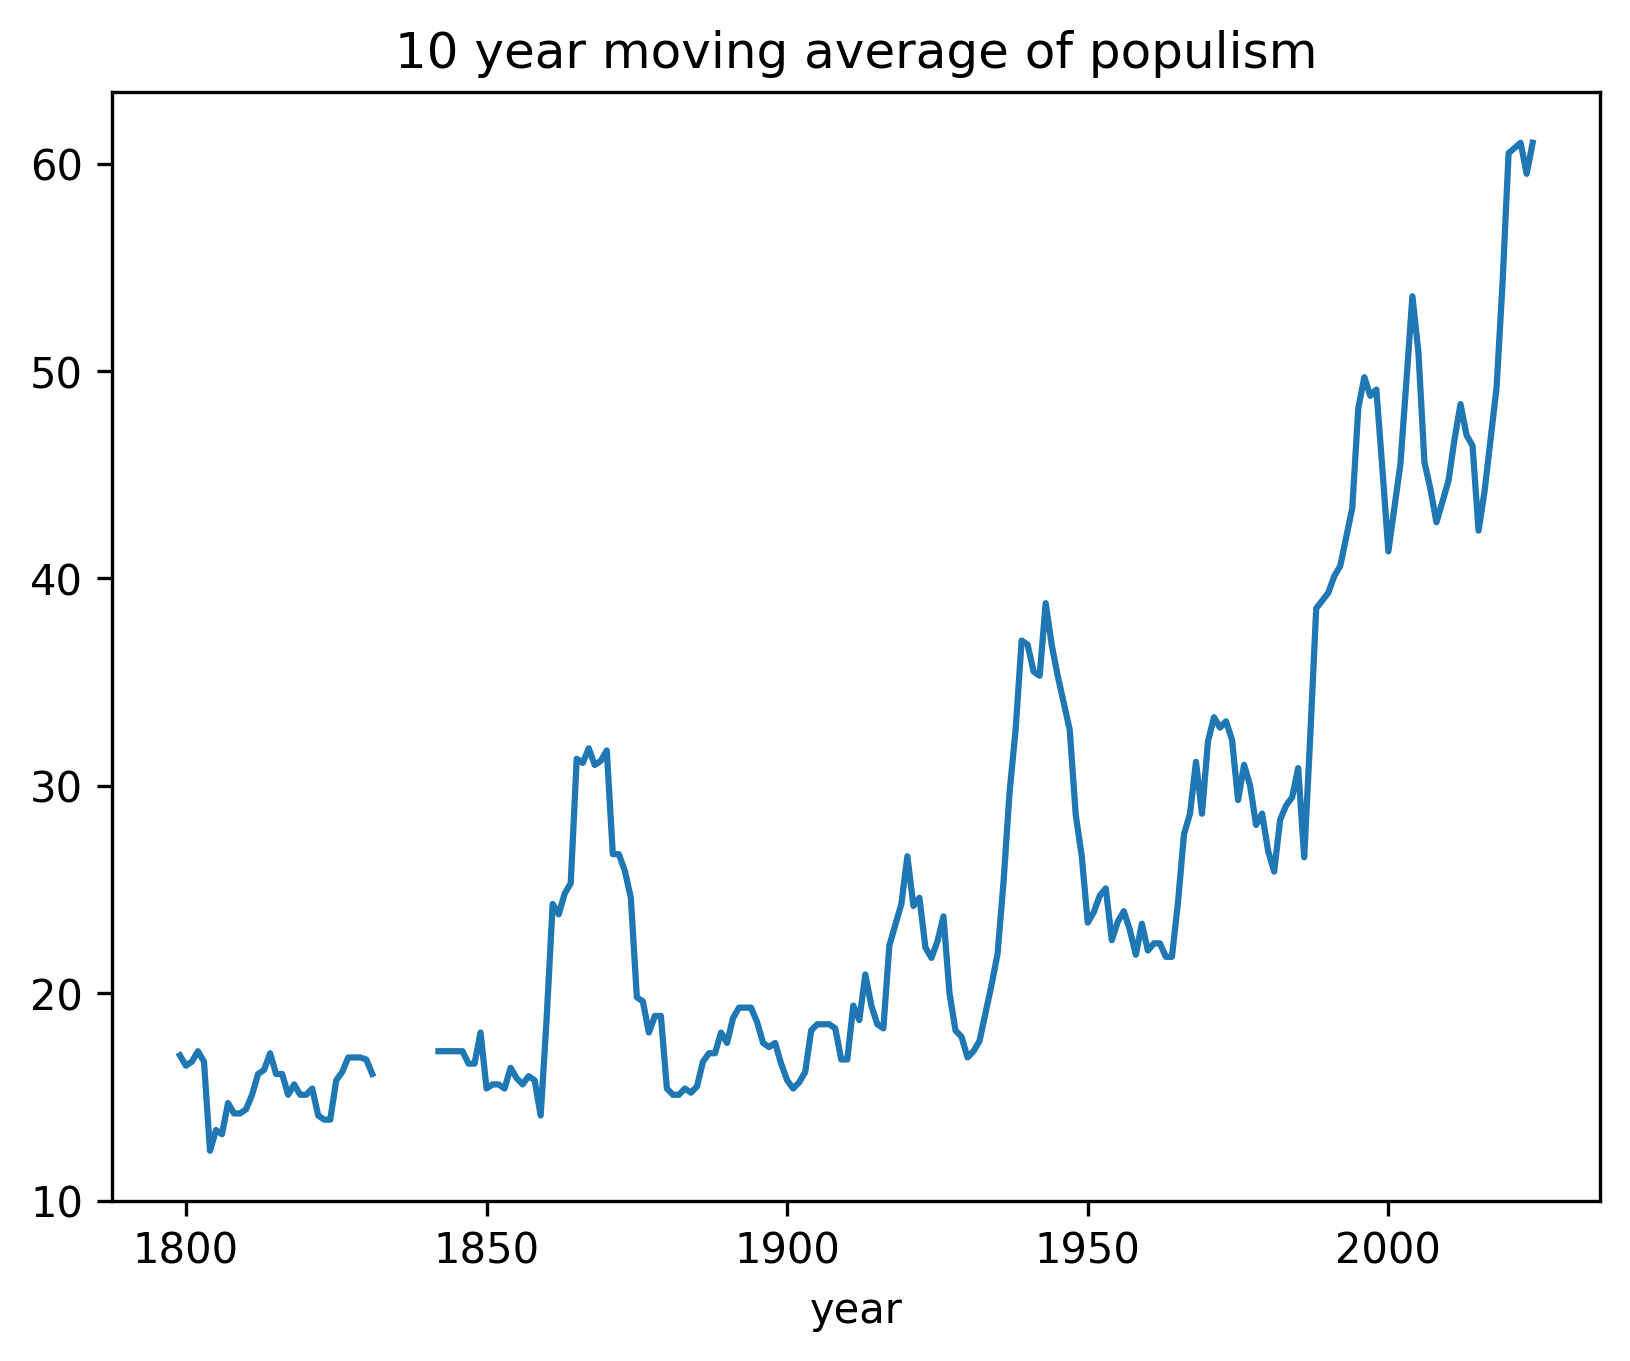

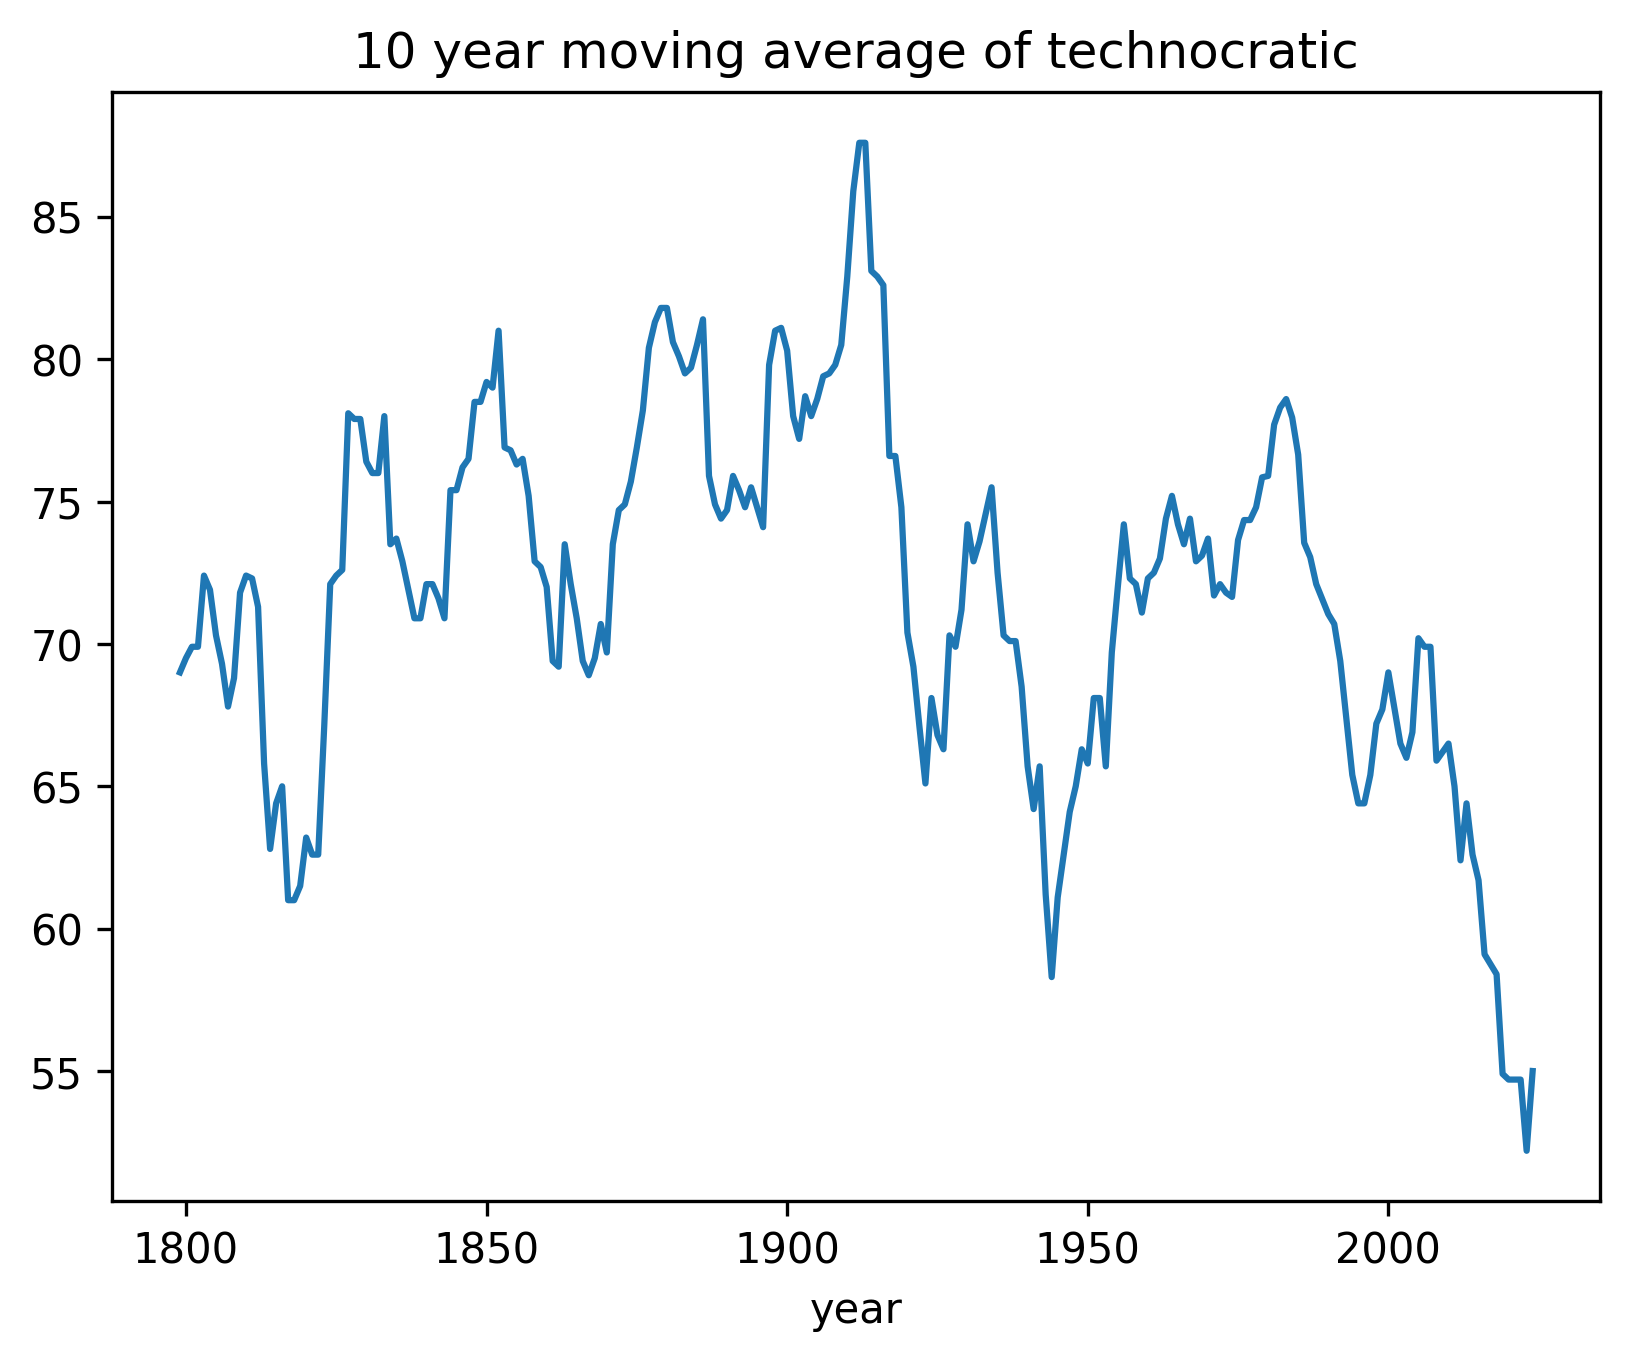

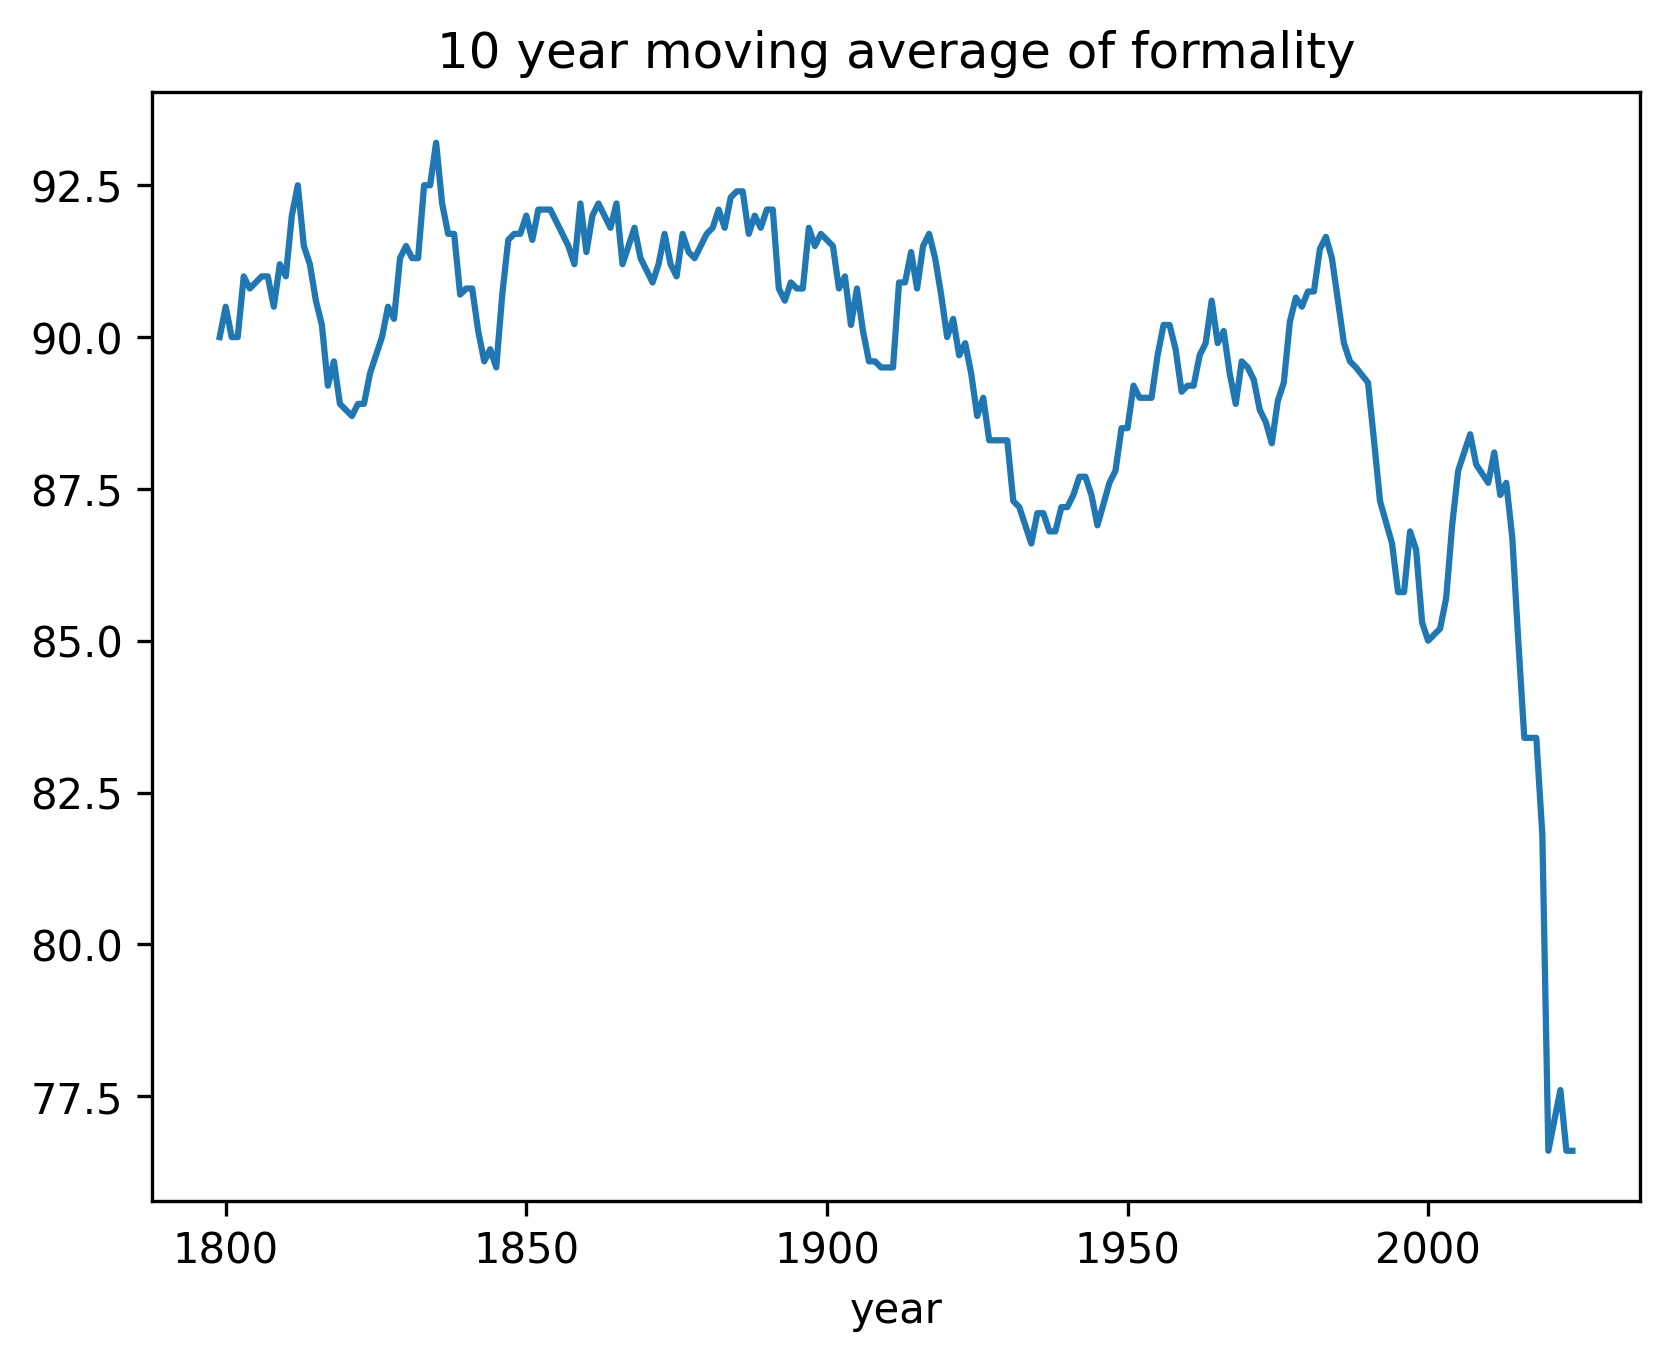

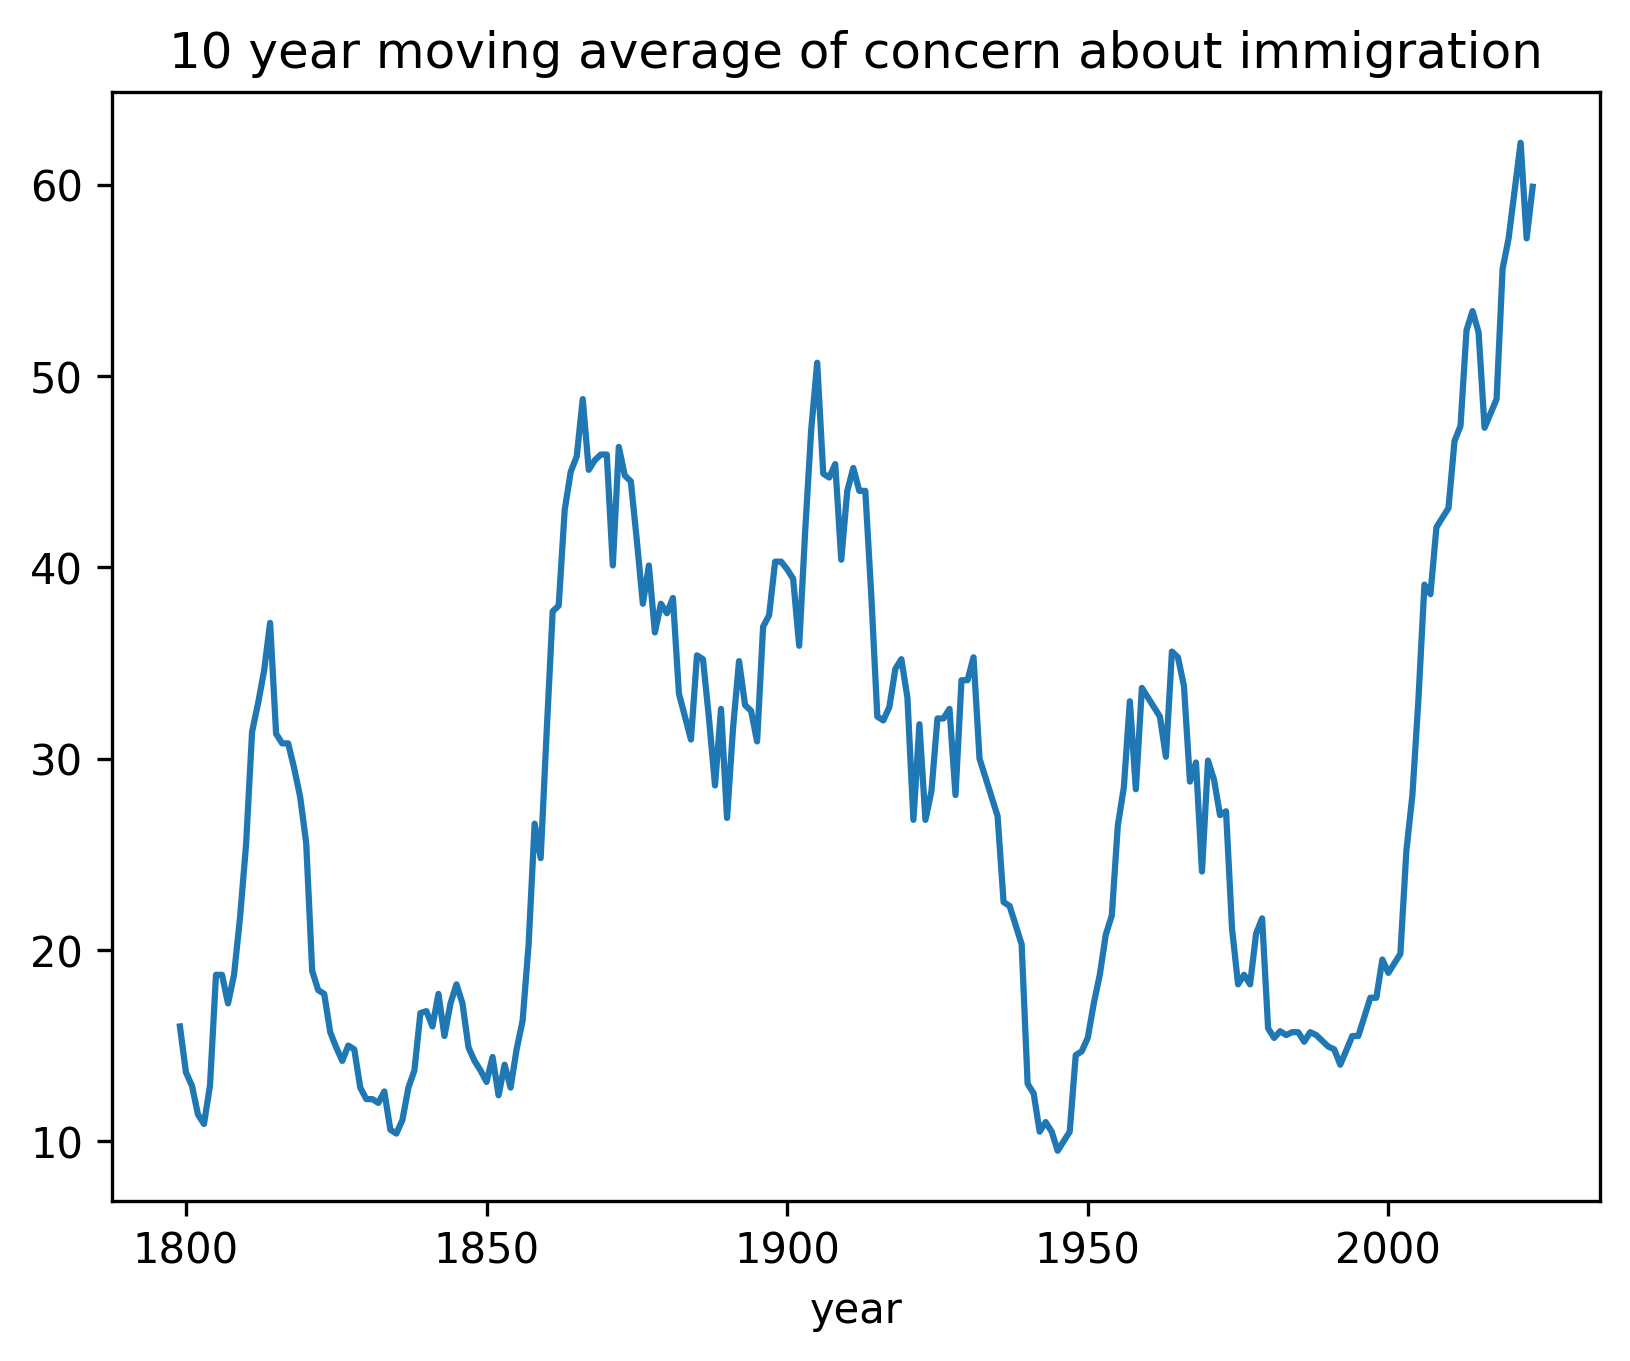

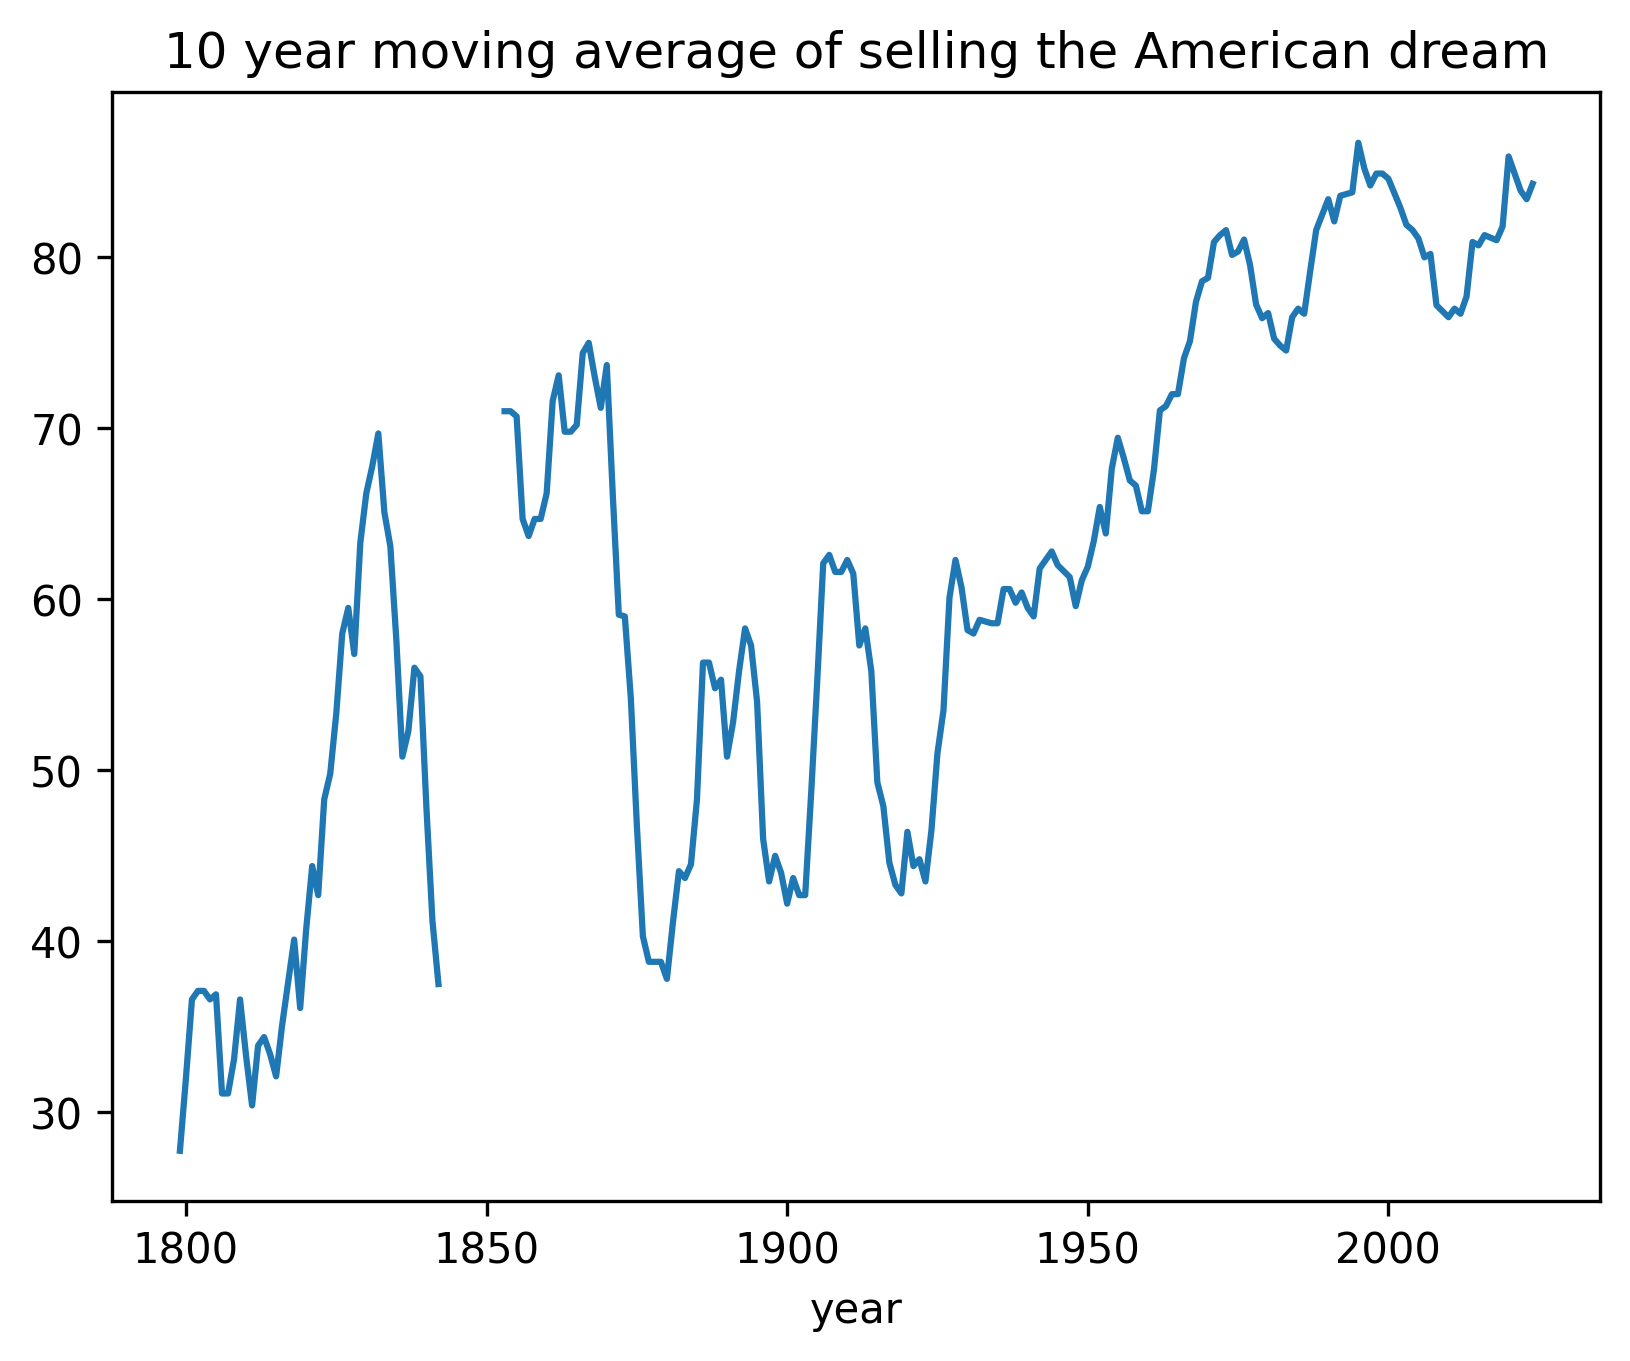

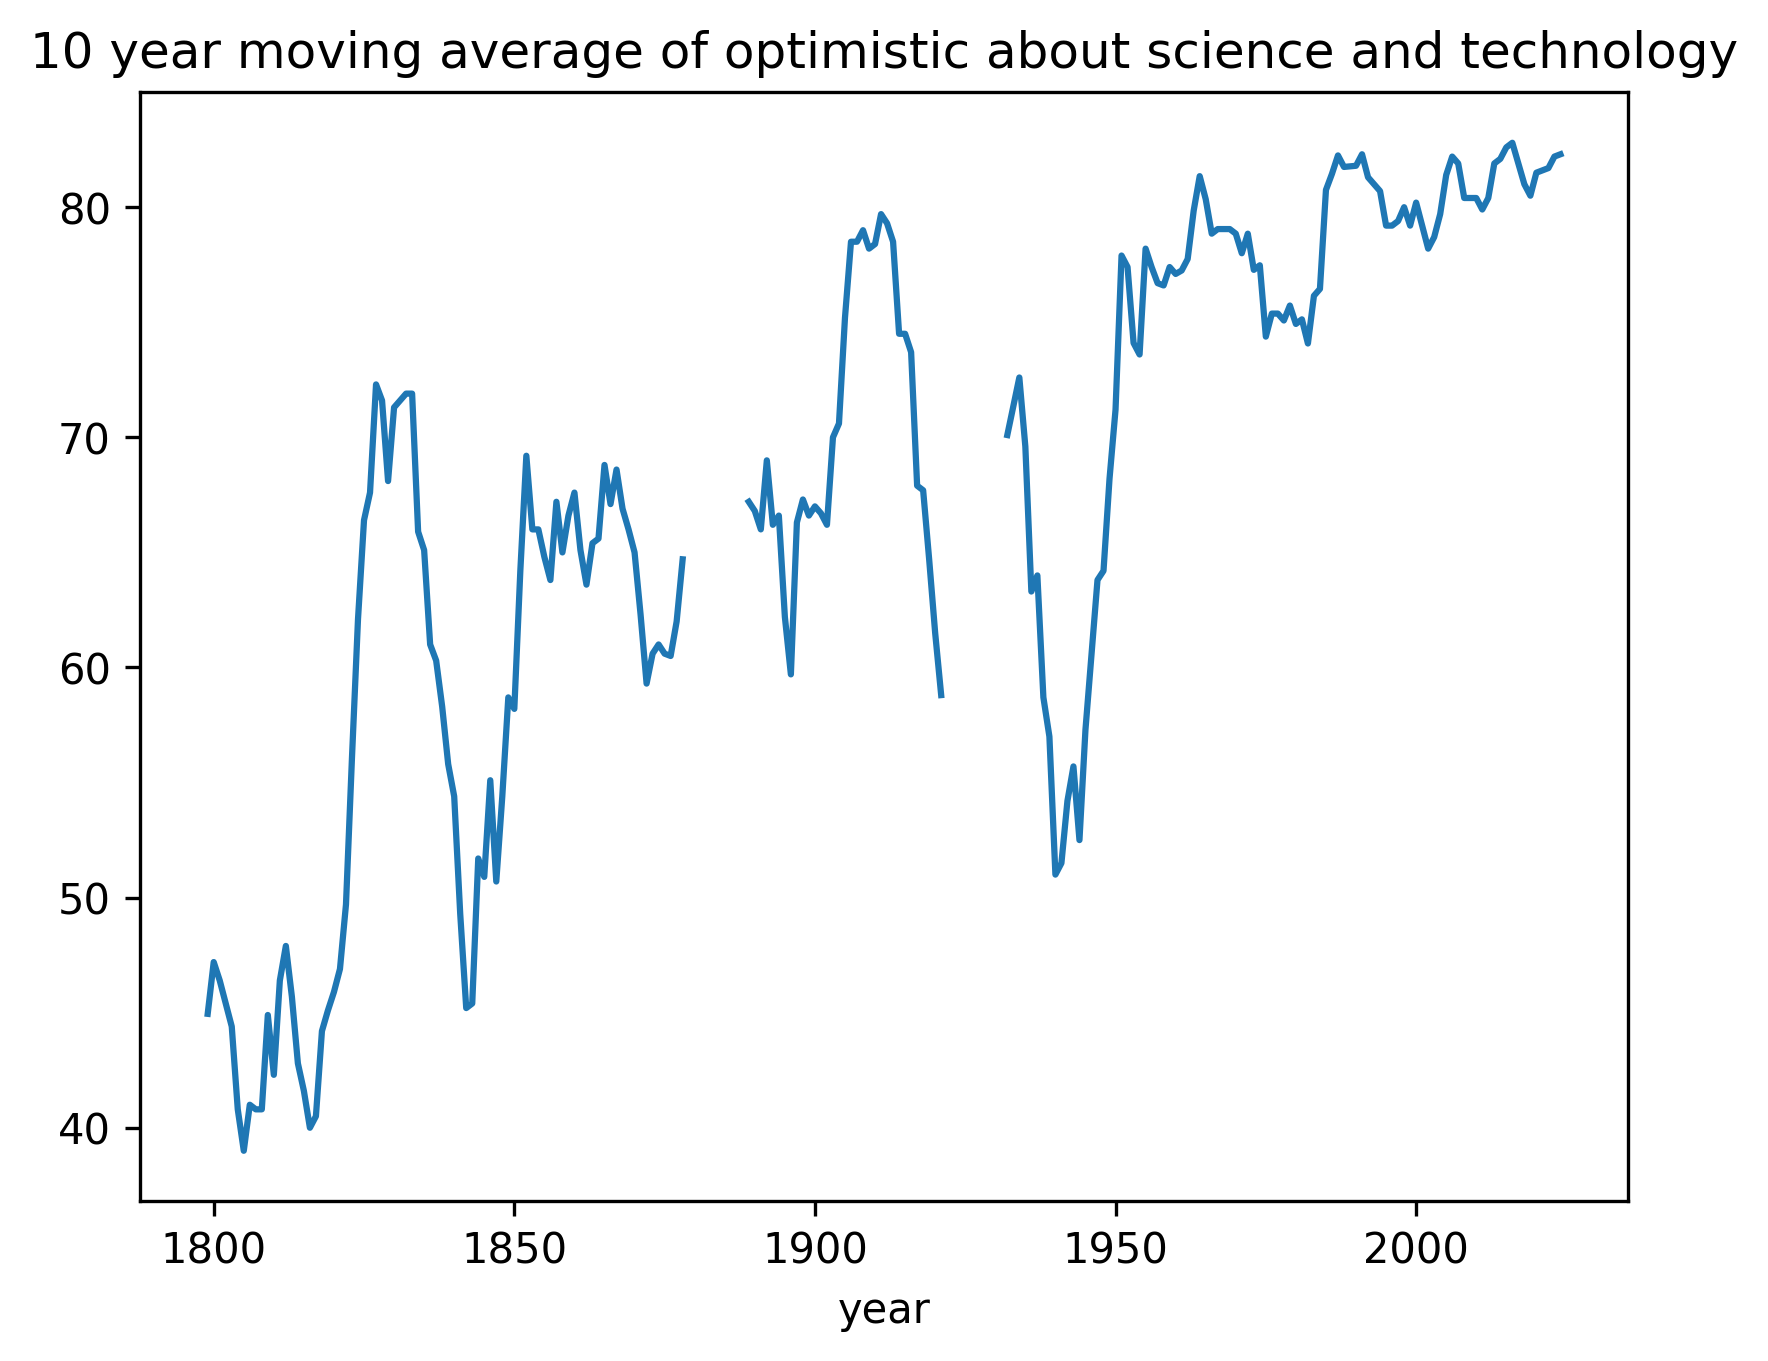

In [ ]:
n_years = 10
grouped = full_results.groupby(['year'])[list(SOTU_FEATURES.keys())].mean().rolling(10).mean()
for col in grouped.columns:
  grouped[col].plot()
  plt.title(f'{n_years} year moving average of {col}')
  plt.show()

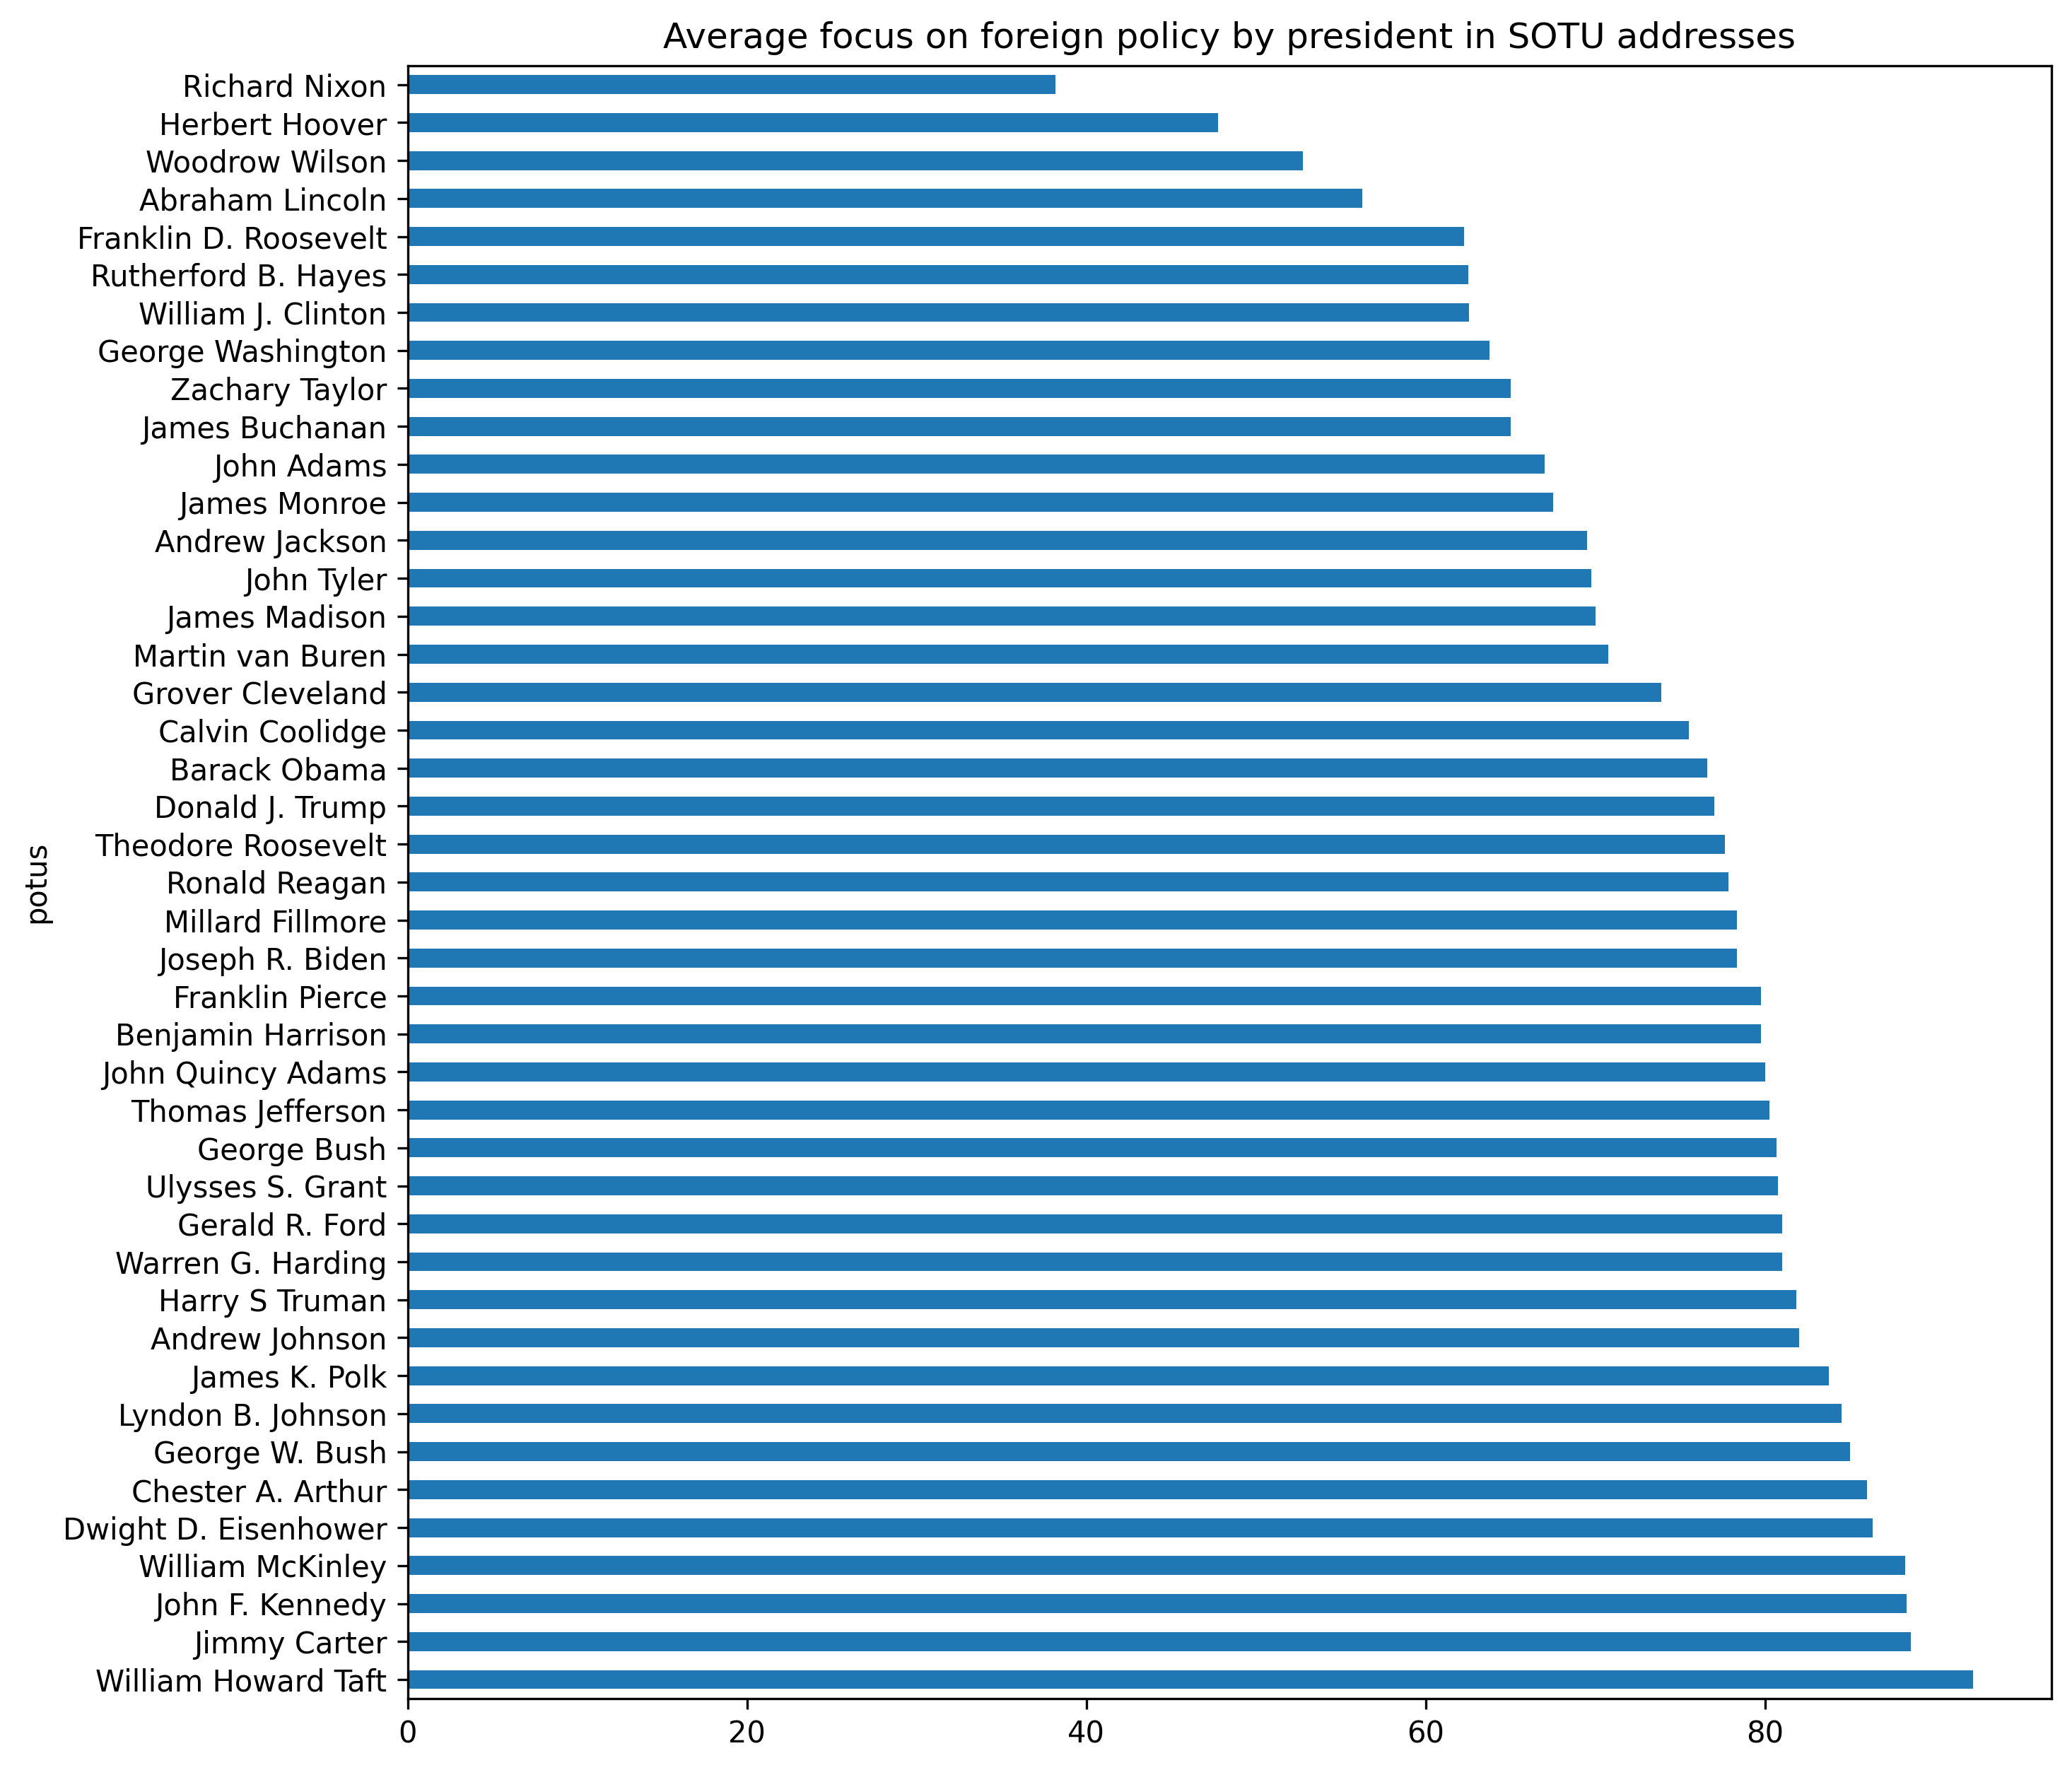

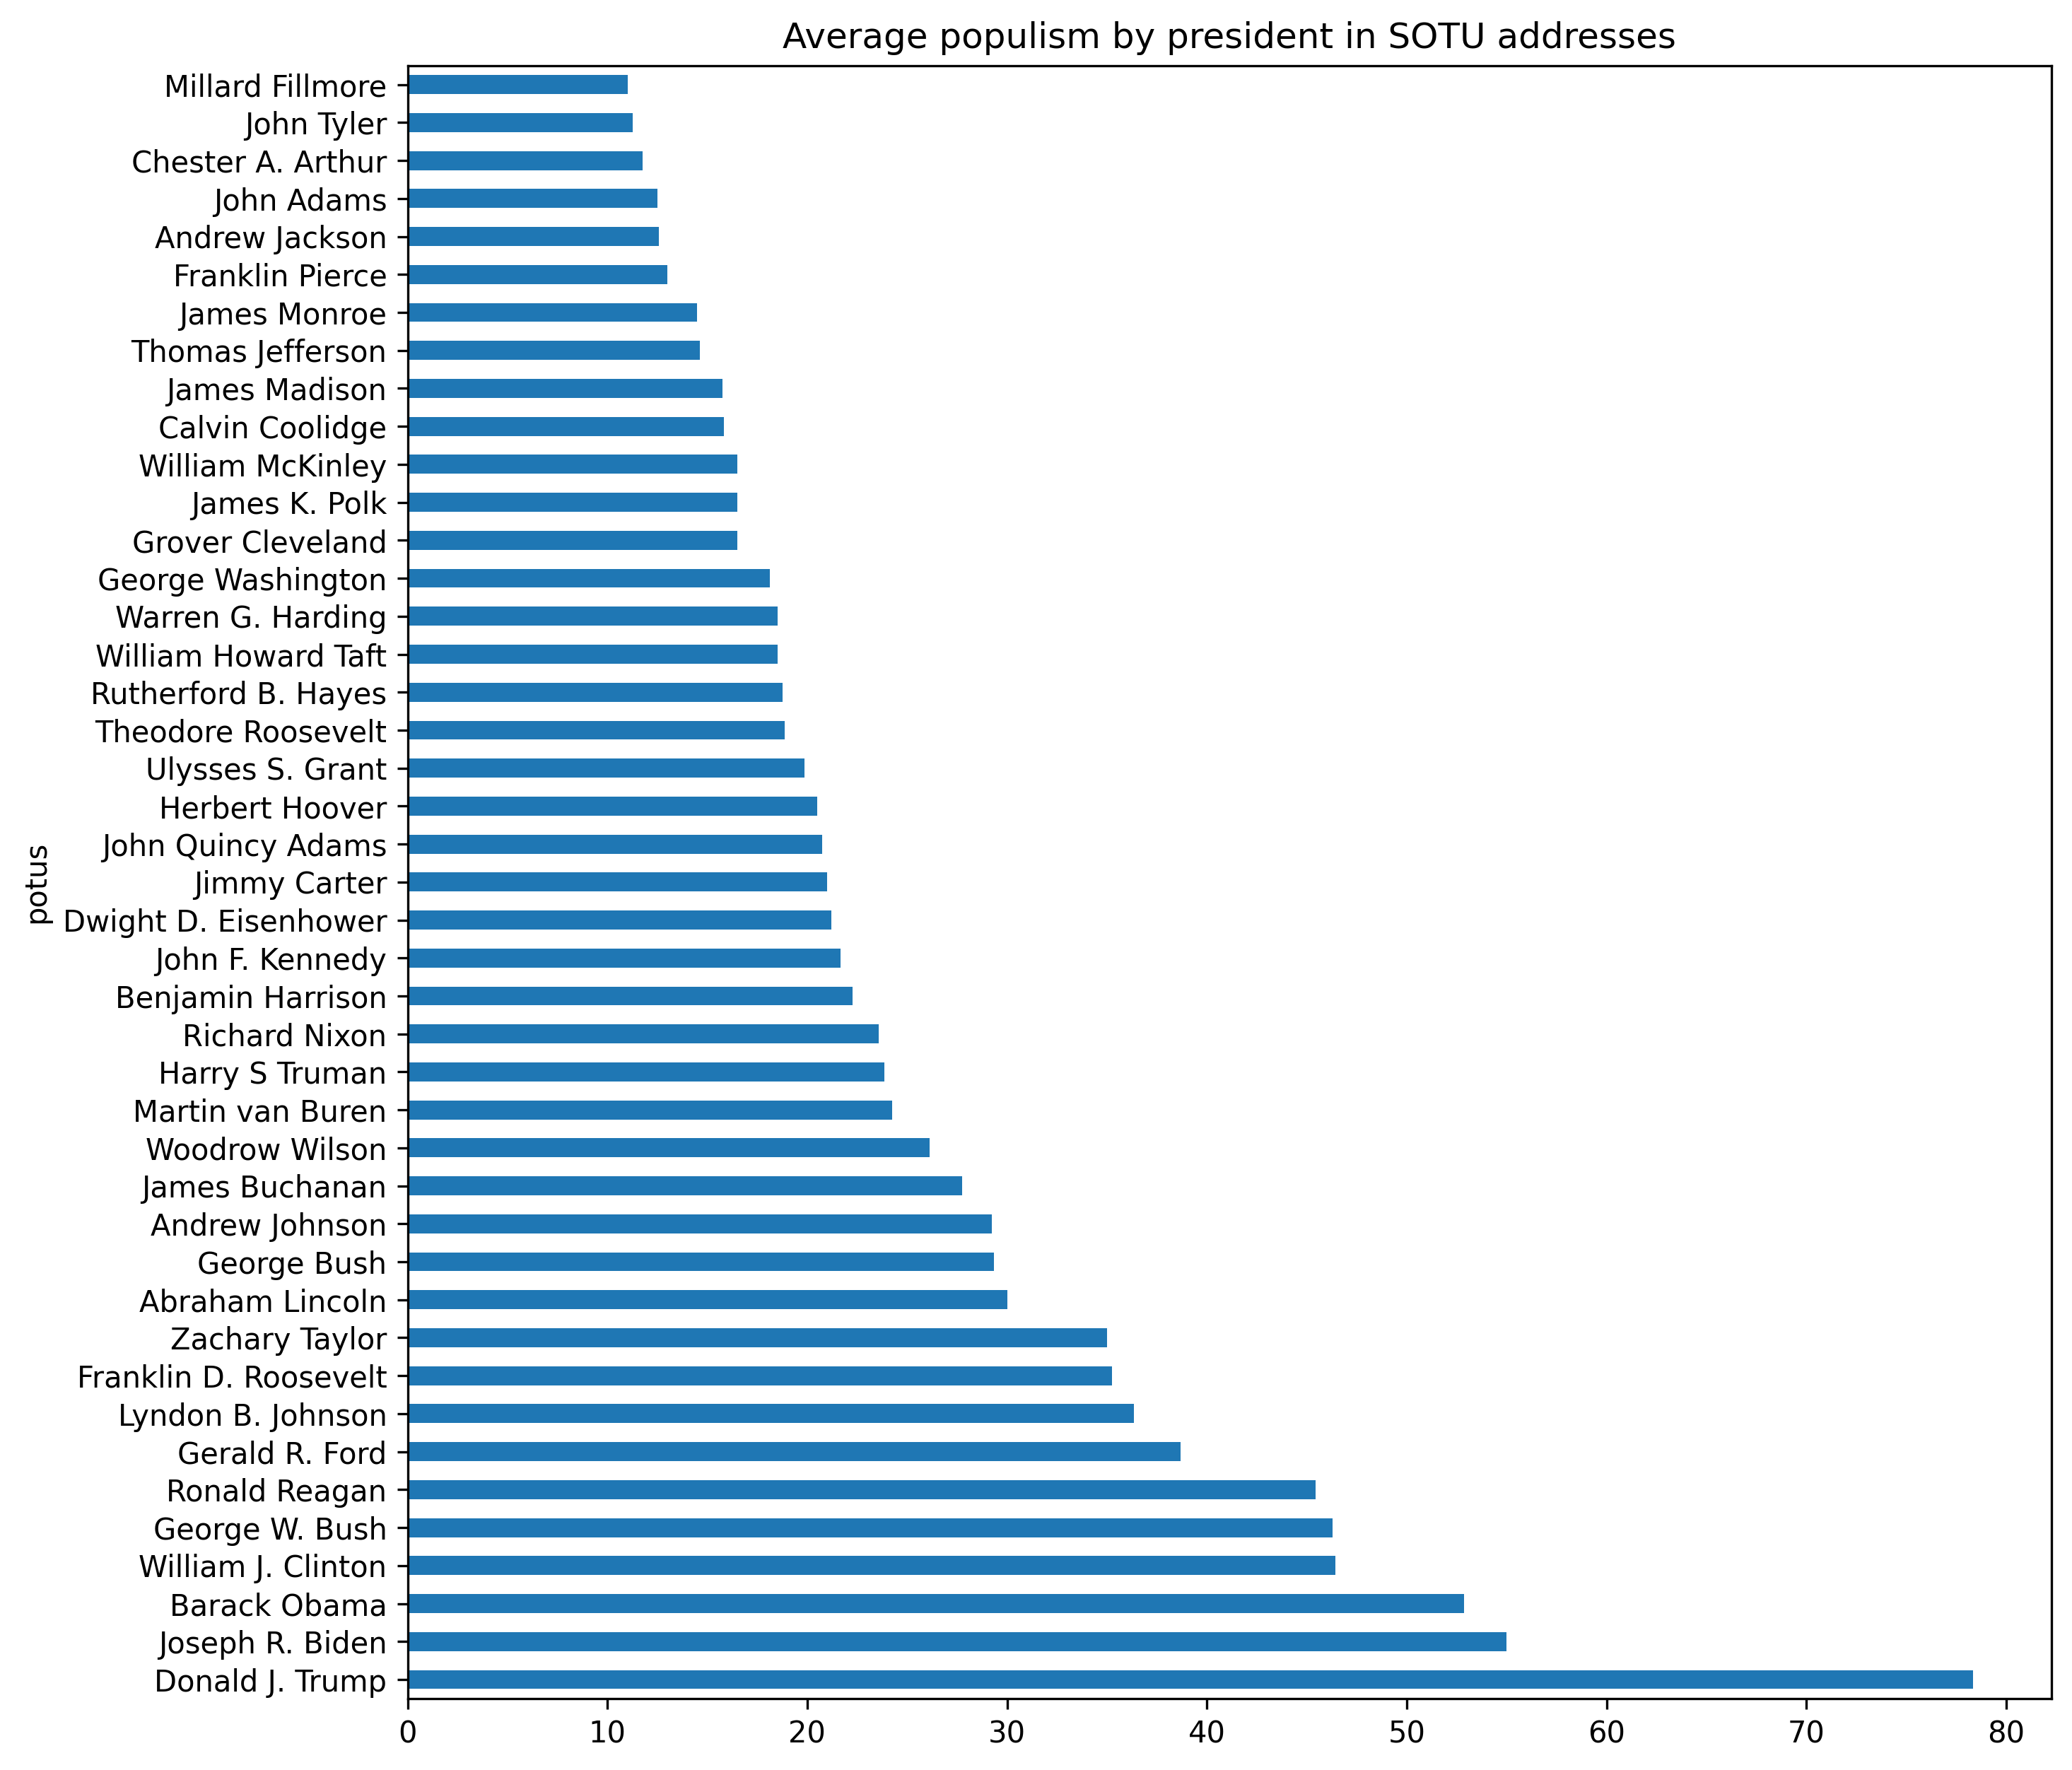

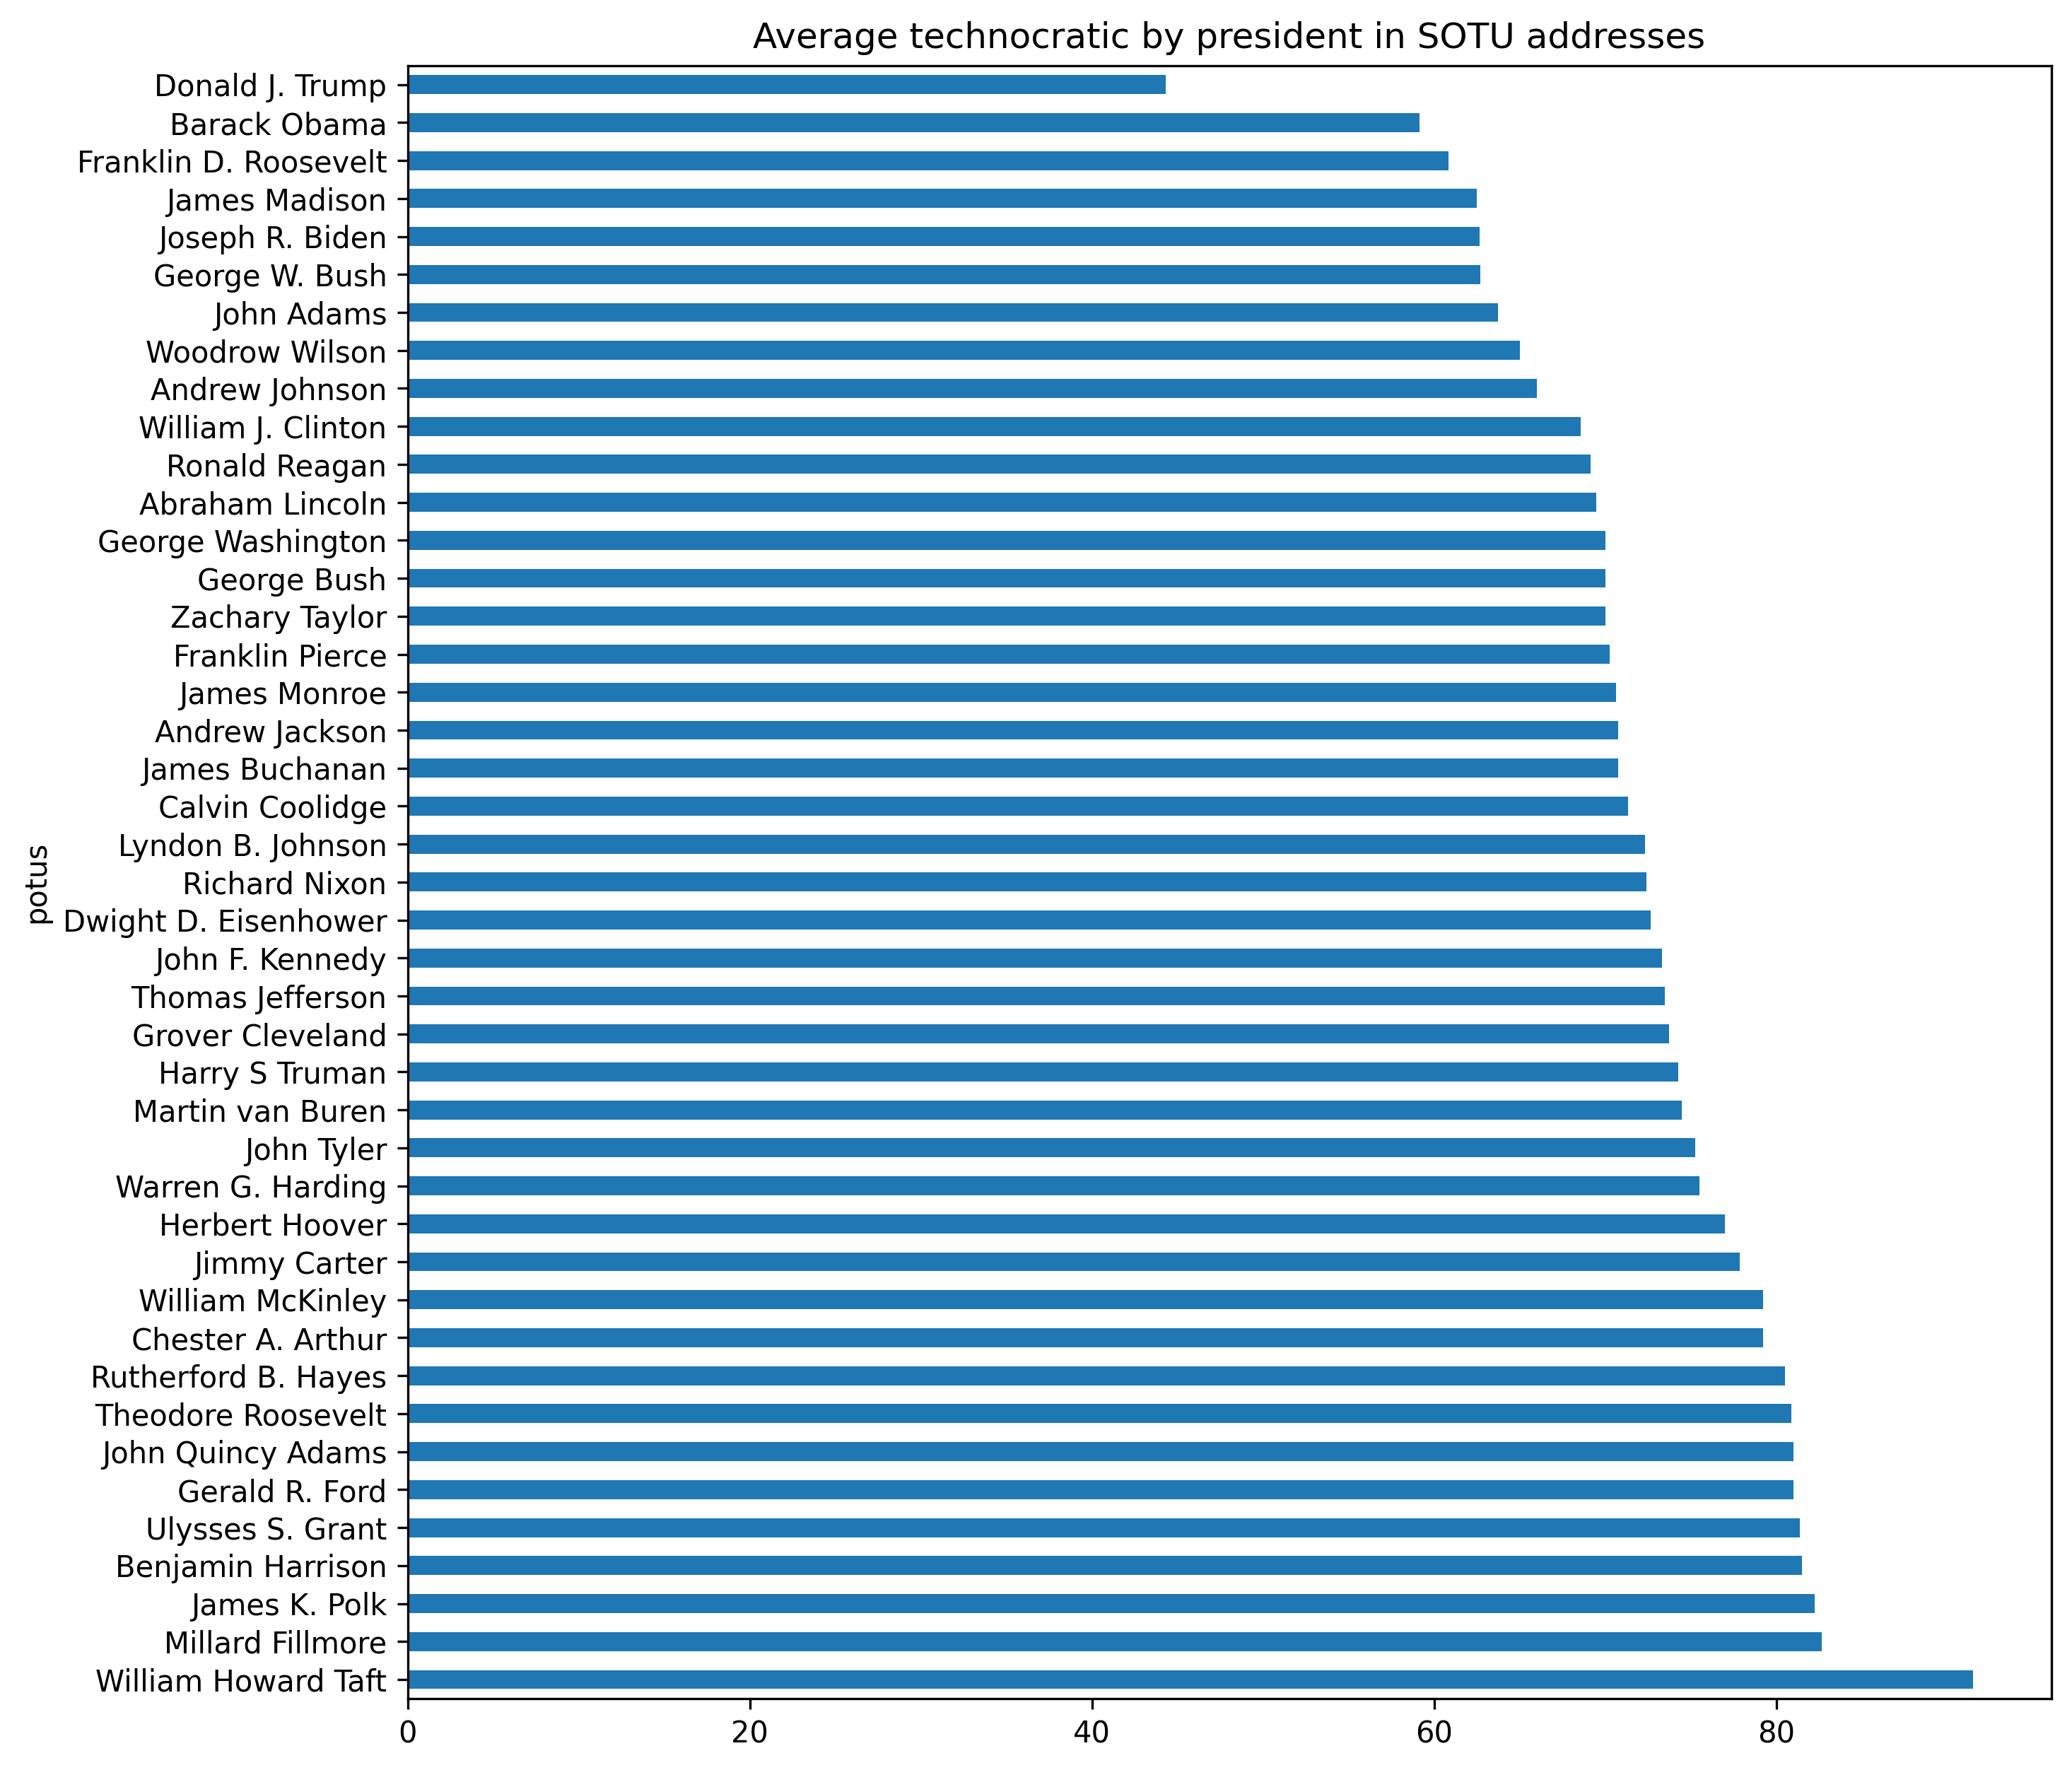

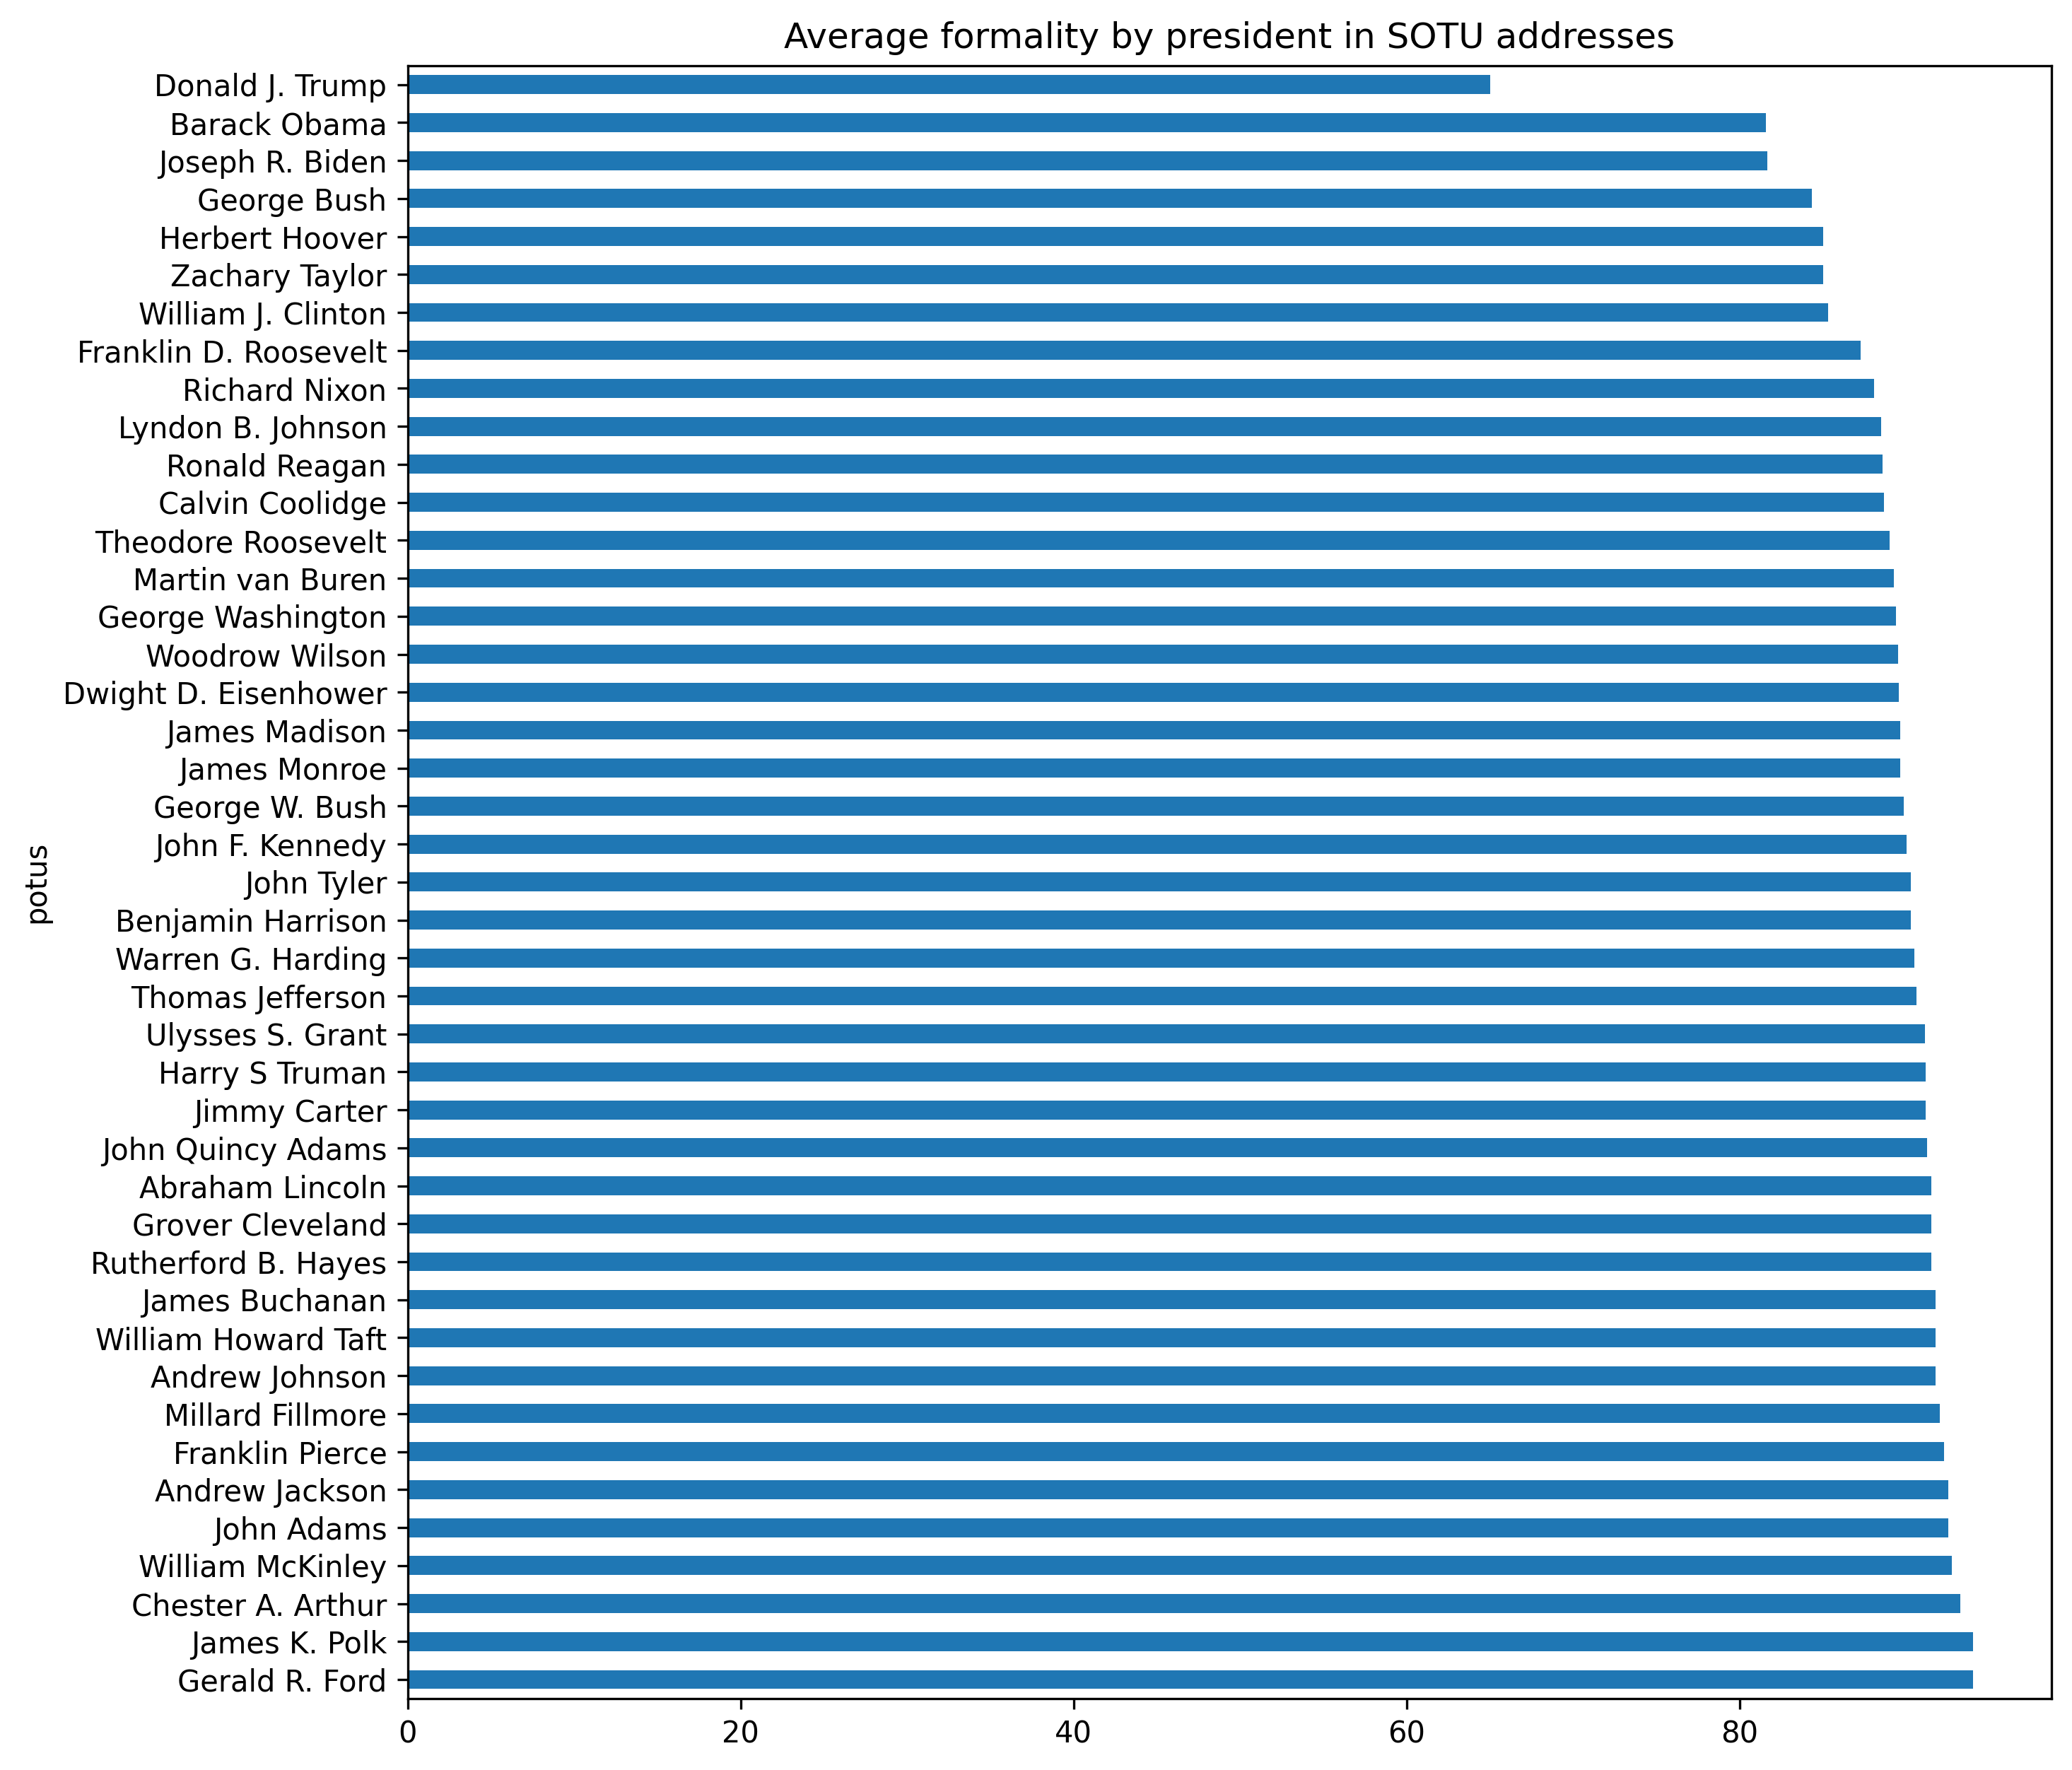

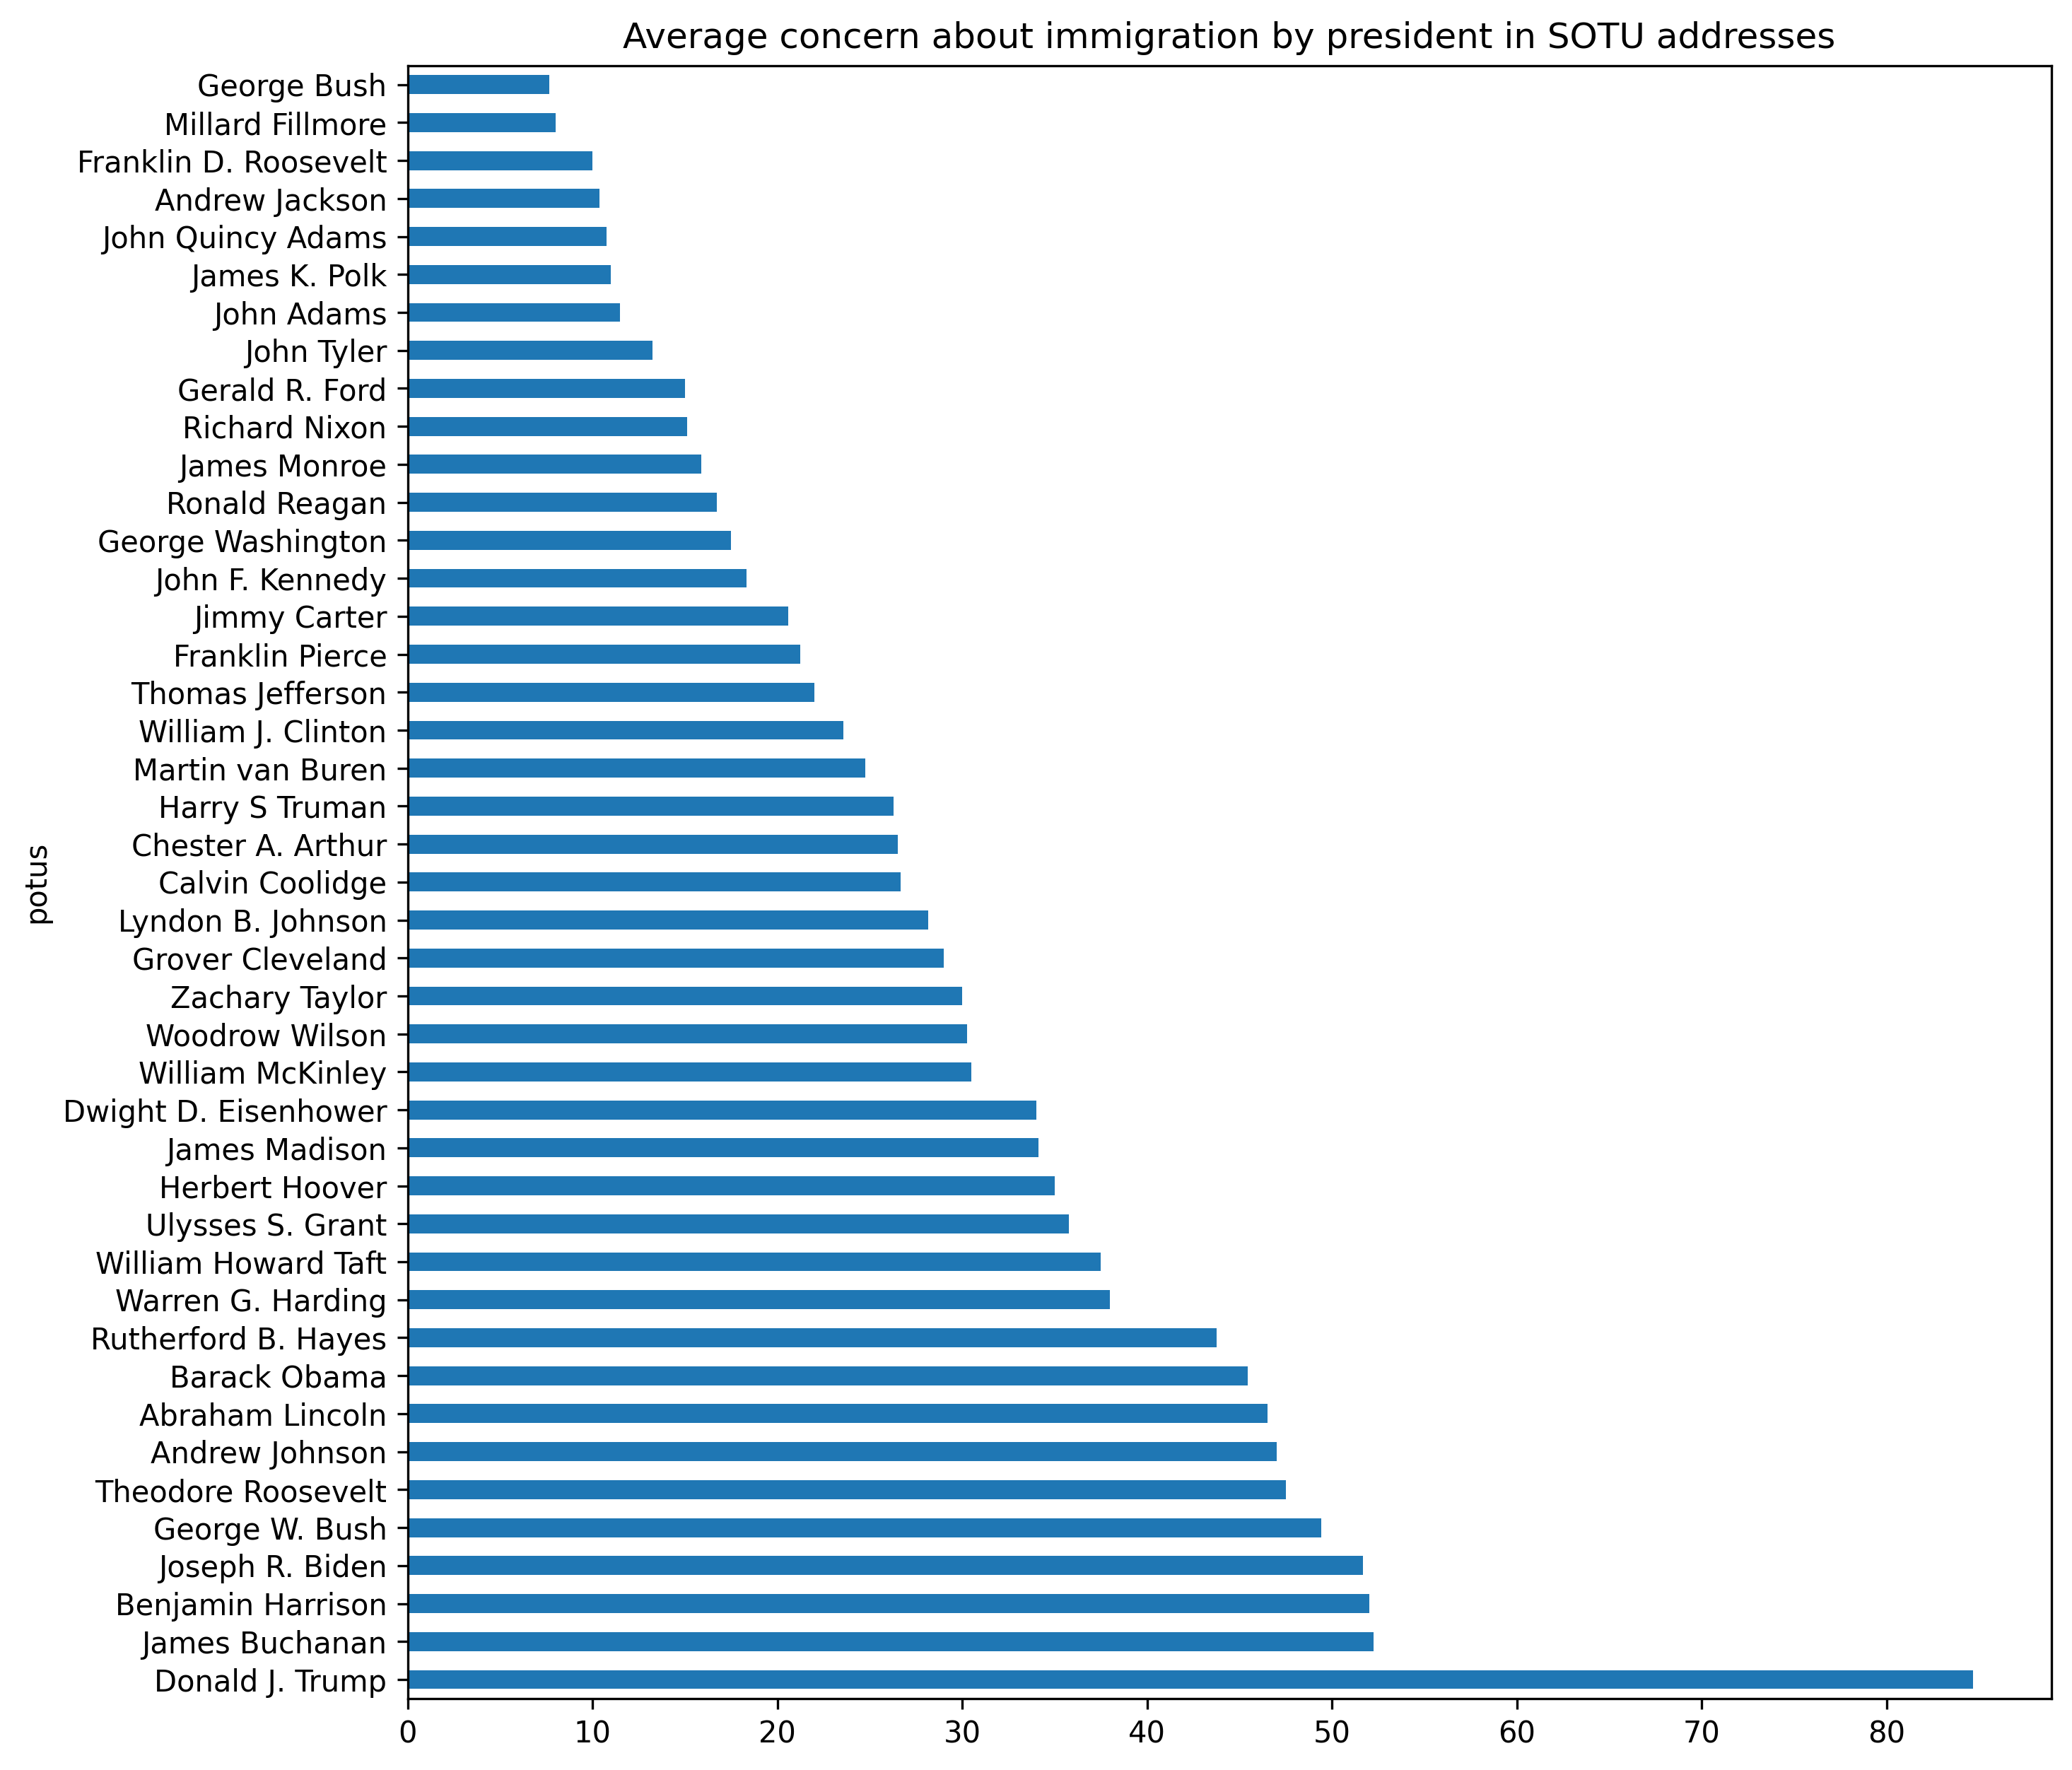

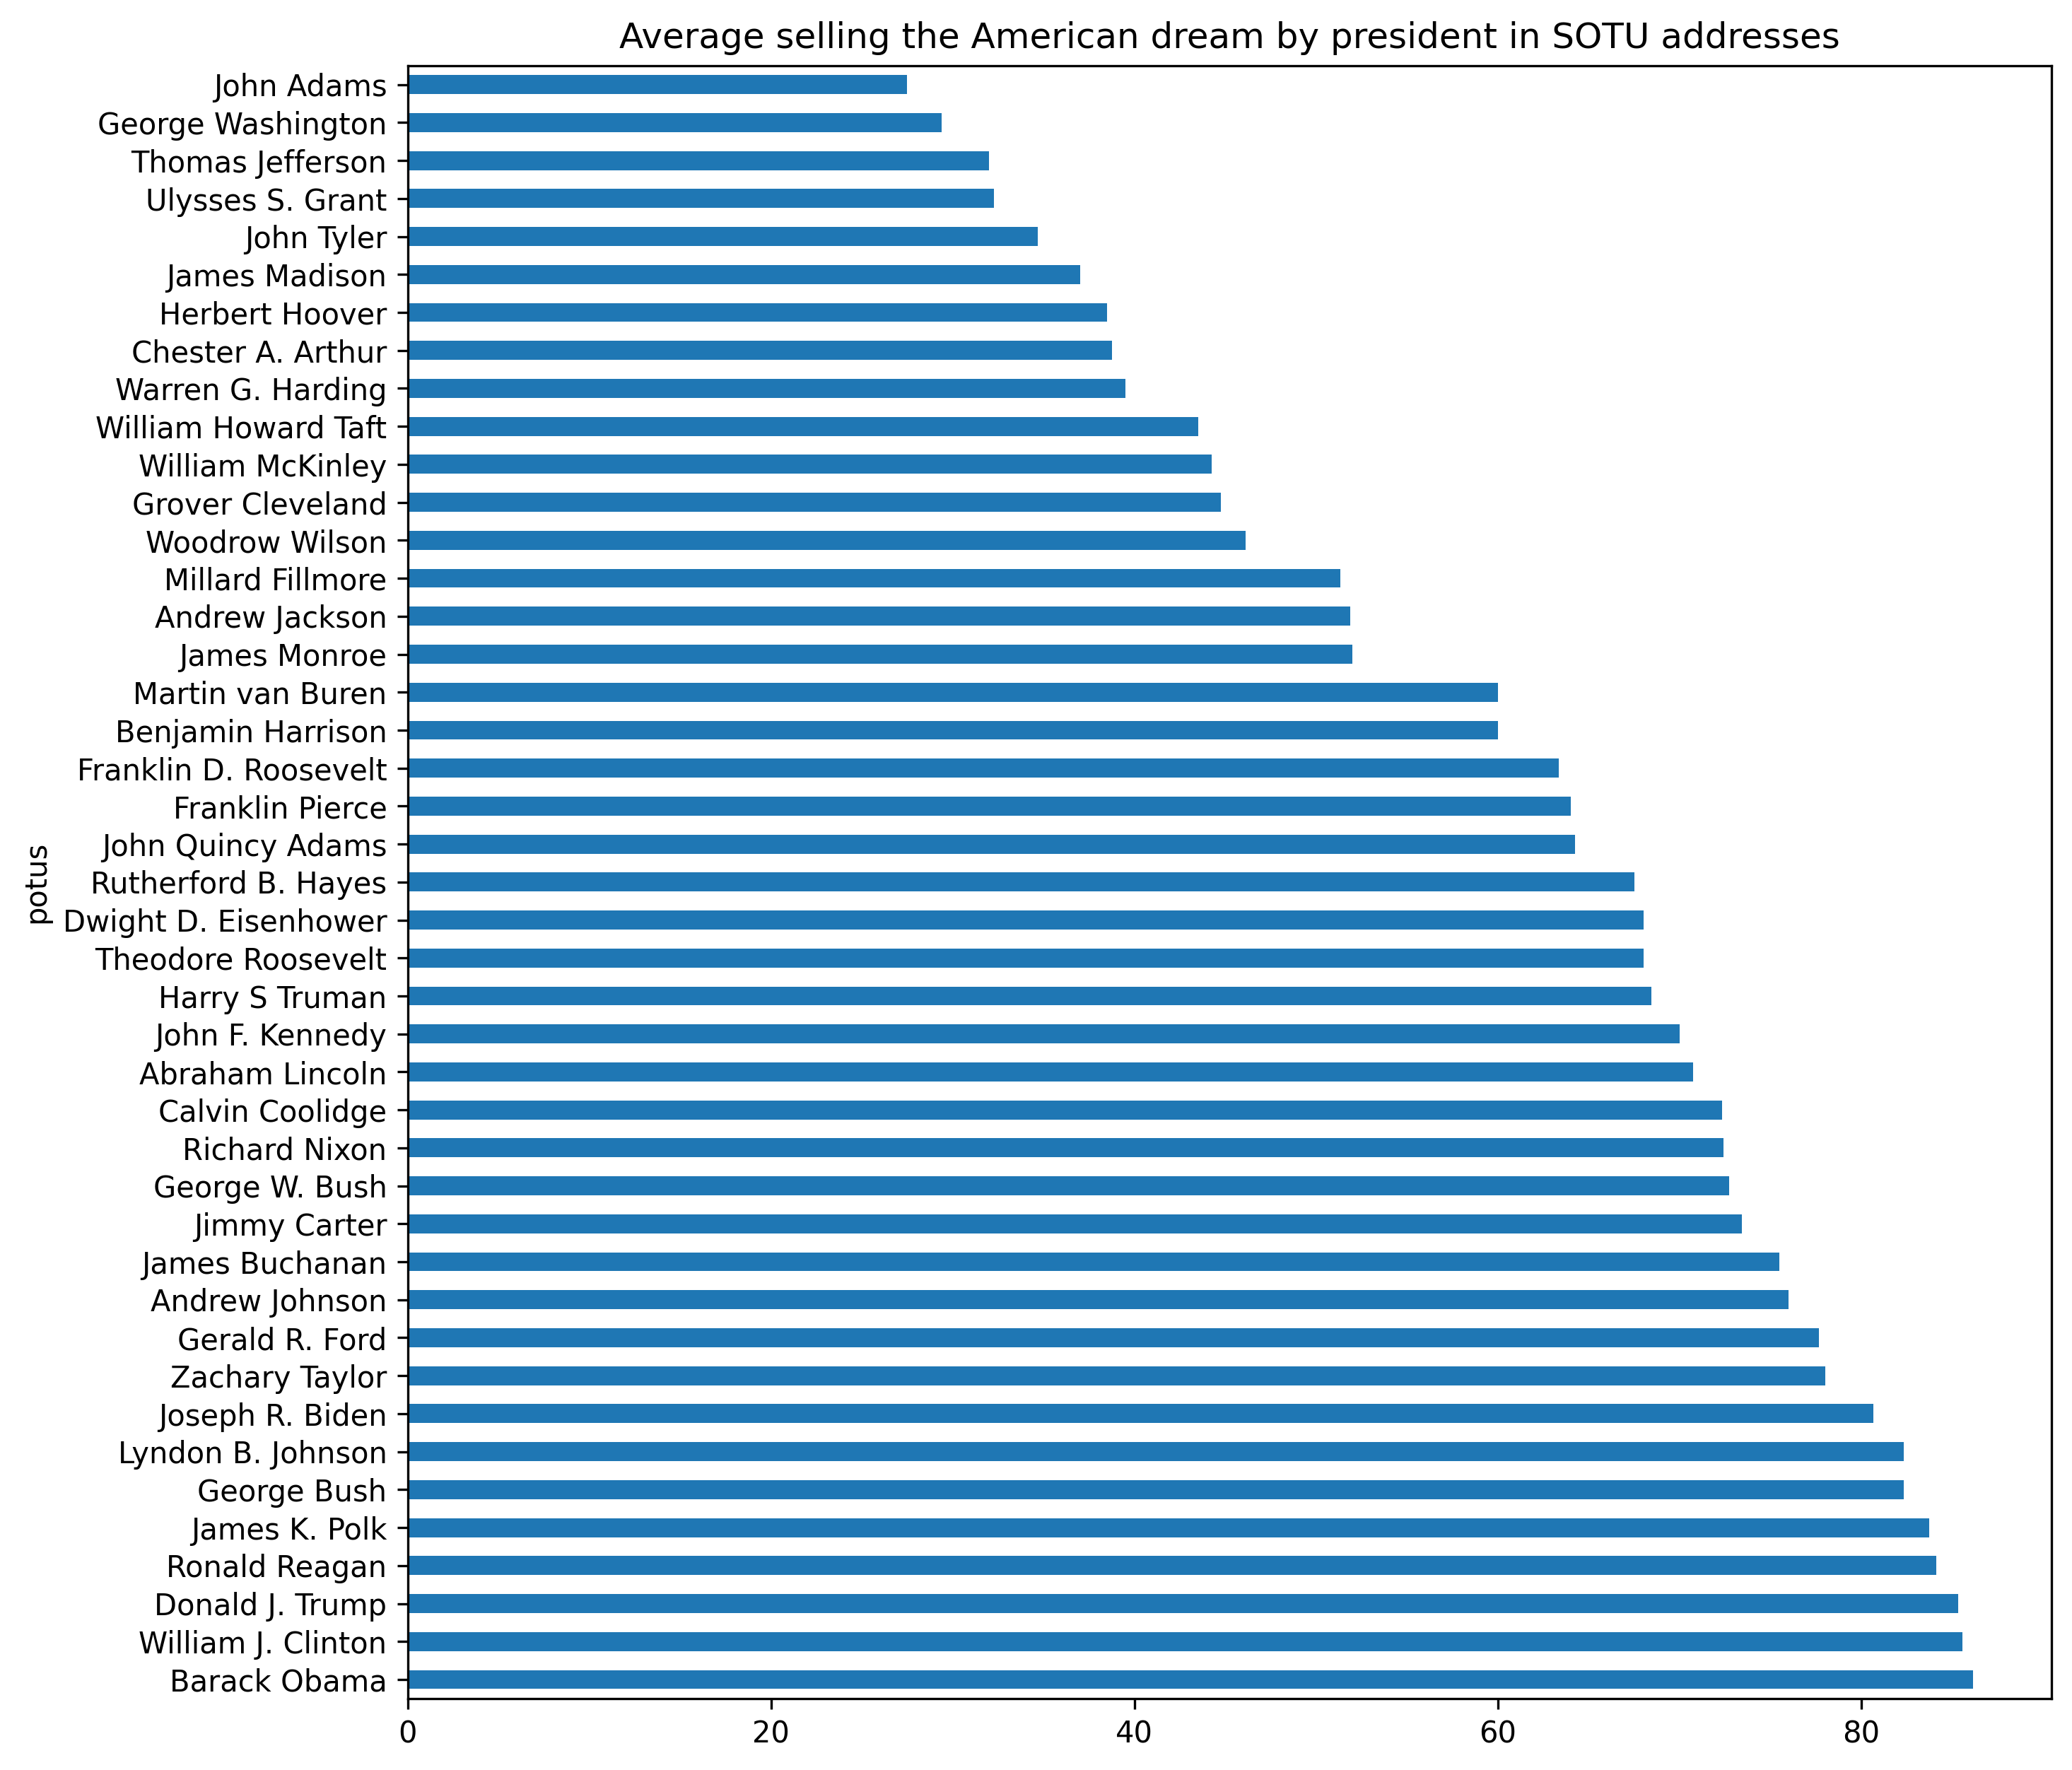

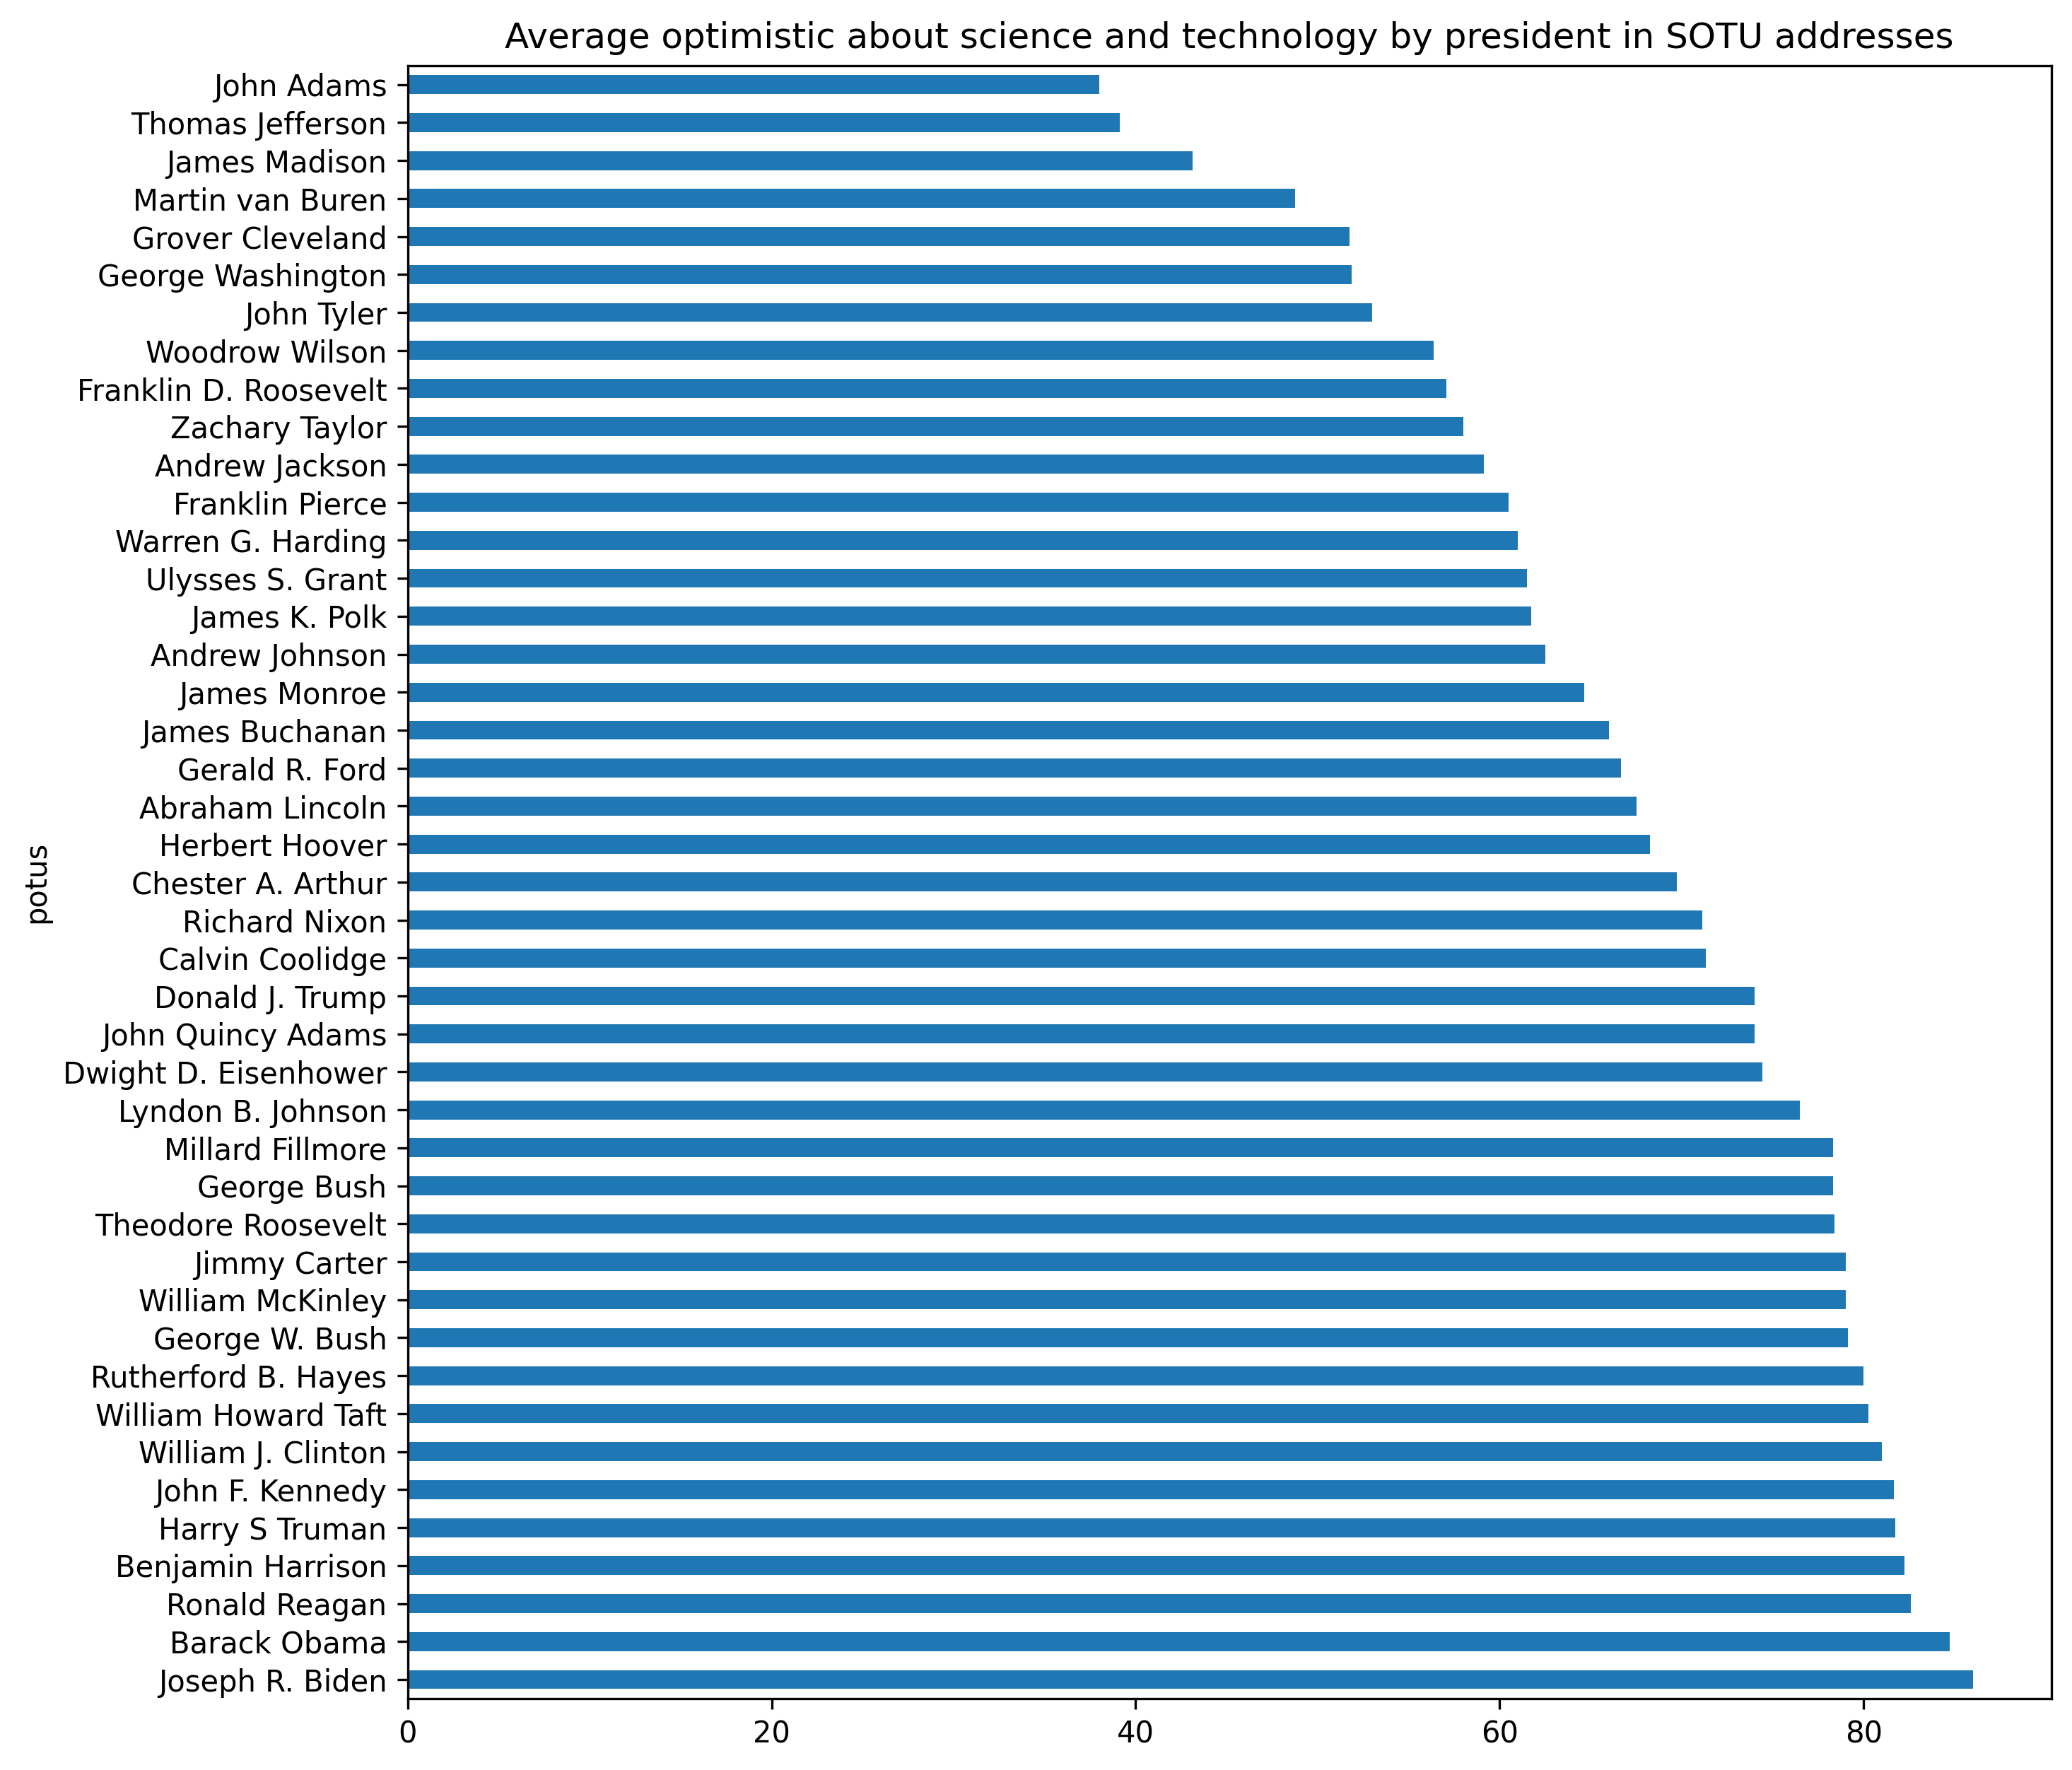

In [ ]:
grouped = full_results.groupby(['potus'])[list(SOTU_FEATURES.keys())].mean()
for col in grouped.columns:
  plt.figure(figsize = (10,10))
  grouped[col].sort_values(ascending = False).plot(kind = 'barh')
  plt.title(f'Average {col} by president in SOTU addresses')
  plt.show()

# Ranking texts

Very similarly to the above, we can also use GABRIEL to rank texts. The use case is similar to the use case for ratings: we want to create a continuous numerical evaluation of the texts. The difference here is that our ratings will be **relative**, not absolute.

I.e. we do not pre-define a ratings scale like 0-100; we do many pairwise comparisons of texts and then iterate them to get an ordering of where each text is in the relative distribution.

The call to the method is analogous to the rate method. It is more expensive and computationally complex due to the need to do iterative comparisons instead of one-shot ratings. The only change is the *n_rounds* parameter which controls how many iterations of the round-robin / tournament we run.

## Toy example

In [ ]:
toy_data = pd.DataFrame({"text": [
    "While your conclusion is careless, the deployment will likely improve consumer surplus.",
    "R&D intensity rose from 12% to 18% YoY; margins may compress before productivity gains materialize.",
    "That take is clown shoes—learn the basics before posting.",
    "Low-key hyped for on-device models—privacy win without the lag.",
    "@mina you’re right; the vendor ghosted us again—unacceptable.",
    "I concur with @lee: the policy update meaningfully strengthens user control.",
    "Subscription gating for security patches undermines trust.",
    "Empirical evidence suggests platform concentration exacerbates rent extraction absent interoperability mandates.",
    "New chips slap; battery life finally sane.",
    "Your deterministic framing is naïve; nonetheless, the architecture promises substantial welfare gains.",
    "If inference cost drops below $0.001/query, long-tail apps become viable; otherwise, unit economics fail.",
    "@devon is right—bait-and-switch trials are predatory; users deserve defaults that respect consent.",
    "Benchmarks improved 12→19 on MTEB; small but real.",
    "Anyone shouting “AI is over” is farming engagement—spare us.",
    "The deployment evidences credible privacy-by-design, a salutary precedent for the sector.",
    "Love the features, hate the upsells—pick a lane.",
    "Claims of AGI progress conflate scaling curves with capability thresholds; the evidence remains circumstantial.",
    "Good thread, @arya—clear, fair, helpful.",
    "Yes, lock-in is gross, but cross-vendor APIs mean switching costs are falling.",
    "With respect, your argument misrepresents the data and borders on bad faith."
]})

attributes = {
    "optimistic about technology": "Positive outlook on technology’s future or impact.",
    "anger": "Expression of frustration or hostility.",
    "formality": "Professional or academic style and structure.",
    "toxicity towards other users": "Insults, belittling, or demeaning remarks aimed at other users or groups.",
    "use of logic": "Explicit reasoning or evidence (numbers, if-then claims, comparisons, citations)."
}

results = await gabriel.rank(
    toy_data,
    column_name="text",          # name of column with posts to rank
    attributes=attributes,       # attributes to rank by
    n_rounds=4,                  # number of ELO rounds (more = more pairwise judgments)
    matches_per_round=3,         # 3 * 4 means 12 total matchups for every entry
    save_dir="toy_rank",         # directory to save results
    model="gpt-5-mini"         # model used for pairwise comparisons
)


In [ ]:
results

text  \
0   While your conclusion is careless, the deploym...   
1   R&D intensity rose from 12% to 18% YoY; margin...   
2   That take is clown shoes—learn the basics befo...   
3   Low-key hyped for on-device models—privacy win...   
4   @mina you’re right; the vendor ghosted us agai...   
5   I concur with @lee: the policy update meaningf...   
6   Subscription gating for security patches under...   
7   Empirical evidence suggests platform concentra...   
8          New chips slap; battery life finally sane.   
9   Your deterministic framing is naïve; nonethele...   
10  If inference cost drops below $0.001/query, lo...   
11  @devon is right—bait-and-switch trials are pre...   
12  Benchmarks improved 12→19 on MTEB; small but r...   
13  Anyone shouting “AI is over” is farming engage...   
14  The deployment evidences credible privacy-by-d...   
15   Love the features, hate the upsells—pick a lane.   
16  Claims of AGI progress conflate scaling curves...   
17           Good thread, @arya—clear, fair, helpful.   
18  Yes, lock-in is gross, but cross-vendor APIs m...   
19  With respect, your argument misrepresents the ...   

    optimistic about technology  optimistic about technology_se  \
0                      1.727995                        1.145395   
1                     -0.999586                        0.929756   
2                     -1.741038                        0.717297   
3                      3.417815                        1.389008   
4                     -1.709309                        0.702156   
5                      0.266066                        0.860207   
6                     -2.026131                        0.713615   
7                     -2.118856                        0.926849   
8                      3.905555                        1.504470   
9                      1.778909                        1.151784   
10                     0.559328                        1.079505   
11                    -1.797518                        0.680034   
12                     2.726679                        1.496567   
13                    -1.507814                        0.651540   
14                     2.894832                        1.425932   
15                    -1.194839                        0.634750   
16                    -1.925188                        0.772212   
17                    -1.118827                       11.227636   
18                     0.832870                        1.223722   
19                    -1.970939                        0.776581   

    optimistic about technology_z     anger  anger_se   anger_z  formality  \
0                        0.857066 -0.316293  0.661519 -0.199141   0.368005   
1                       -0.495783 -0.915695  9.408050 -0.576531   2.270177   
2                       -0.863535  2.154919  1.112077  1.356758  -2.130943   
3                        1.695197 -0.949104  0.683937 -0.597565  -1.575673   
4                       -0.847798  4.368540  1.597135  2.750475  -2.246942   
5                        0.131966 -2.002386  0.868904 -1.260722   0.042134   
6                       -1.004938  0.478396  0.826723  0.301203  -0.850491   
7                       -1.050929 -0.937746  0.605457 -0.590414   3.973413   
8                        1.937111 -1.172298  0.717891 -0.738090  -1.909958   
9                        0.882319 -0.721395  0.602751 -0.454197   0.411216   
10                       0.277420 -1.009077  0.632783 -0.635325   1.563370   
11                      -0.891548  0.931846  0.859770  0.586700  -0.757565   
12                       1.352402 -1.038180  0.590794 -0.653648   0.236278   
13                      -0.747858  2.872648  1.320484  1.808647  -1.660231   
14                       1.435804 -0.924574  0.623927 -0.582121   3.711499   
15                      -0.592627 -0.167549  0.760337 -0.105491  -2.121985   
16                      -0.954871 -0.728902  0.633480 -0.458924   2.597312   
17                      -0.554926 -1.57

## Full rankings example

Let's reuse the SOTU speeches from above. We will this time rank them relative to each other instead of using direct rating.

In [ ]:
from datasets import load_dataset
speeches = load_dataset("jsulz/state-of-the-union-addresses")

elo_data = speeches['train'].to_pandas()
attributes={'populism':'the extent to which the text emphasizes populist values',
                'conservatism':'how politically and socially conservative is the text'}
elo_res = await gabriel.rank(elo_data.sample(30), column_name='speech_html',
                             n_rounds = 2, save_dir = 'elo_speeches',
                             attributes = attributes,
                             model = 'gpt-4.1-nano')
elo_res


===== OpenAI API usage summary =====
Number of prompts: 46
Total input words: 755,605
Requests per minute: 500 – maximum API calls you can make each minute.
Tokens per minute: 200,000 – maximum input + output tokens allowed per minute.
Words per minute: 100,000 – approximate number of words you can process per minute (2 tokens ≈ 1 word).

Note: your organization also has a monthly usage cap based on your tier. See the usage tiers below for details.

Usage tiers:
  • Free: qualifies by User must be in an allowed geography; monthly quota $100 / month
  • Tier 1: qualifies by $5 paid; monthly quota $100 / month
  • Tier 2: qualifies by $50 paid and 7+ days since first payment; monthly quota $500 / month
  • Tier 3: qualifies by $100 paid and 7+ days since first payment; monthly quota $1 000 / month
  • Tier 4: qualifies by $250 paid and 14+ days since first payment; monthly quota $5 000 / month
  • Tier 5: qualifies by $1 000 paid and 30+ days since first payment; monthly quota $200 000 

Processing prompts:   0%|          | 0/46 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/gabriel/utils/openai_utils.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, batch_df], ignore_index=True)



===== OpenAI API usage summary =====
Number of prompts: 45
Total input words: 742,293
Requests per minute: 500 – maximum API calls you can make each minute.
Tokens per minute: 200,000 – maximum input + output tokens allowed per minute.
Words per minute: 100,000 – approximate number of words you can process per minute (2 tokens ≈ 1 word).

Note: your organization also has a monthly usage cap based on your tier. See the usage tiers below for details.

Usage tiers:
  • Free: qualifies by User must be in an allowed geography; monthly quota $100 / month
  • Tier 1: qualifies by $5 paid; monthly quota $100 / month
  • Tier 2: qualifies by $50 paid and 7+ days since first payment; monthly quota $500 / month
  • Tier 3: qualifies by $100 paid and 7+ days since first payment; monthly quota $1 000 / month
  • Tier 4: qualifies by $250 paid and 14+ days since first payment; monthly quota $5 000 / month
  • Tier 5: qualifies by $1 000 paid and 30+ days since first payment; monthly quota $200 000 

Processing prompts:   0%|          | 0/45 [00:00<?, ?it/s]

/usr/local/lib/python3.11/dist-packages/gabriel/utils/openai_utils.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, batch_df], ignore_index=True)


potus        date categories  \
0              John Adams  1800-11-22     Spoken   
1   Franklin D. Roosevelt  1934-01-03     Spoken   
2   Franklin D. Roosevelt  1945-01-06    Written   
3       Warren G. Harding  1922-12-08     Spoken   
4            Barack Obama  2010-01-27     Spoken   
5            Barack Obama  2013-02-12     Spoken   
6          Gerald R. Ford  1976-01-19     Spoken   
7         Calvin Coolidge  1927-12-06    Written   
8           James K. Polk  1848-12-05    Written   
9           Richard Nixon  1974-01-30     Spoken   
10          Ronald Reagan  1985-02-06     Spoken   
11  Franklin D. Roosevelt  1939-01-04     Spoken   
12       Grover Cleveland  1895-12-02    Written   
13       Martin van Buren  1837-12-05    Written   
14           James Monroe  1820-11-14    Written   
15        Franklin Pierce  1856-12-02    Written   
16      George Washington  1793-12-03     Spoken   
17         Woodrow Wilson  1919-12-02    Written   
18      Lyndon B. Johnson  1969-01-14     Spoken   
19  Franklin D. Roosevelt  1944-01-11    Written   
20         Andrew Jackson  1835-12-08    Written   
21           James Monroe  1824-12-07    Written   
22        Abraham Lincoln  1864-12-06    Written   
23        Calvin Coolidge  1926-12-07    Written   
24         Woodrow Wilson  1915-12-07     Spoken   
25          Richard Nixon  1970-01-22     Spoken   
26         Woodrow Wilson  1917-12-04     Spoken   
27     Theodore Roosevelt  1908-12-08    Written   
28        John F. Kennedy  1962-01-11     Spoken   
29          James K. Polk  1847-12-07    Written   

                                          speech_html  \
0   Immediately after the adjournment of Congress ...   
1   Mr. President, Mr. Speaker, Senators and Repre...   
2   To the Congress: In considering the State of t...   
3   So many problems are calling for solution that...   
4   Madam Speaker, Vice President Biden, Members o...   
5   Please, everybody, have a seat. Mr. Speaker, M...   
6   Mr. Speaker, Mr. Vice President, Members of th...   
7   \n It is gratifying to report that for the fou...   
8   Under the benignant providence of Almighty God...   
9   We meet here tonight at a time of great challe...   
10  Mr. Speaker, Mr. President, distinguished Memb...   
11  Mr. Vice President, Mr. Speaker, Members of th...   
12  The present assemblage of the legislative bran...   
13  We have reason to renew the expression of our ...   
14  In communicating to you a just view of public ...   
15  The Constitution requires that the President s...   
16  Since the commencement of the term for which I...   
17  TO THE SENATE AND HOUSE OF REPRESENTATIVES: I ...   
18  For the sixth and the last time, I present to ...   
19  This Nation in the past two years has become a...   
20  In the discharge of my official duty the task ...   
21  The view which I have now to present to you of...   
22  Again the blessings of health and abundant har...   
23  \n In reporting to the Congress the state of t...   
24  Since I last had the privilege of addressing y...   
25  Mr. Speaker, Mr. President, my colleagues in t...   
26  Eight months have elapsed since I last had the...   
27  The financial standing of the Nation at the pr...   
28  [As delivered in person before a joint session...   
29  The annual meeting of Congress is always an in...   

                                      no-contractions  \
0   Immediately after the adjournment of Congress ...   
1   Mr. President, Mr. Speaker, Senators and Repre...   
2   To the Congress: In considering the State of t...   
3   So many problems are calling for solution that...   
4   Madam Speaker, Vice President Biden, Members o...   
5   Please, everybody, have a seat. Mr. Speaker, M...   
6   Mr. Speaker, Mr. Vice President, Members of th...   
7   It is gratifying to report that for the fourth...   
8   Under the benignant providence of Almighty God...   
9   We meet here tonight at a time of great challe...   
10  Mr. Spea

# Passage coding (labelling sections of text)

In [ ]:
import gabriel
from datasets import load_dataset
speeches = load_dataset("jsulz/state-of-the-union-addresses")
ds = speeches['train'].to_pandas()

coding = await gabriel.codify(ds.head(), column_name = 'speech_html', save_dir = 'speech_coding')

In [ ]:
coding

potus       date categories  \
0      Richard Nixon 1972-01-20     Spoken   
1  Lyndon B. Johnson 1966-01-12     Spoken   
2  Lyndon B. Johnson 1965-01-04     Spoken   
3      Richard Nixon 1972-01-20    Written   
4      Richard Nixon 1970-01-22     Spoken   

                                         speech_html  \
0  Mr. Speaker, Mr. President, my colleagues in t...   
1  [ Delivered in person before a joint session a...   
2  On this Hill which was my home, I am stirred b...   
3  To the Congress of the United States: It was j...   
4  Mr. Speaker, Mr. President, my colleagues in t...   

                                     no-contractions  \
0  Mr. Speaker, Mr. President, my colleagues in t...   
1  [ Delivered in person before a joint session a...   
2  On this Hill which was my home, I am stirred b...   
3  To the Congress of the United States: It was j...   
4  Mr. Speaker, Mr. President, my colleagues in t...   

                                              tokens  \
0  [speaker, president, my, colleagues, in, the, ...   
1  [delivered, in, person, before, a, joint, sess...   
2  [on, this, hill, which, was, my, home, i, am, ...   
3  [to, the, congress, of, the, united, states, i...   
4  [speaker, president, my, colleagues, in, the, ...   

                                       tokens-nostop  \
0  [speaker, president, colleagues, congress, dis...   
1  [delivered, person, joint, session, speaker, p...   
2  [hill, home, stirred, old, friendships, though...   
3  [congress, united, states, 3, years, ago, toda...   
4  [speaker, president, colleagues, congress, dis...   

                                          lemmatized  __index_level_0__  \
0  [speaker, president, colleague, congress, dist...                  1   
1  [deliver, person, joint, session, speaker, pre...                  2   
2  [hill, home, stir, old, friendship, though, to...                  3   
3  [congress, unite, state, 3, year, ago, today, ...                  4   
4  [speaker, president, colleague, congress, dist...                  5   

                                      coded_passages  
0  {'U.S. Foreign Policy': ['Our commitment to fr...  
1  {'Vietnam War Policies': ['We will stay becaus...  
2  {'Presidency Duties': ['A President's hardest ...  
3  {'Defense Spending and Military Strategy': ['w...  
4  {'Foreign Policy Goals': ['The major immediate...

In [ ]:
gabriel.view_coded_passages(coding, text_column = 'coded_passages', colab = True)

# Merging datasets with inexact columns to merge on

# Deidentifying/anonymizing PII in text
**Using GPT for DeID tasks offers much better results than standard software**, especially for social scientists.

Because it actually understands the content, GPT also can replace PII with fake sustitutes that maintain the original content's character and naturalness (replacing a name with an ethnically similar name, a hometown with a similarly sized different town, etc).

Crucially, **GPT can map all versions of a single PII entity** (John Doe, Johnny, Jon Doe, J-O-H-N) **to the same fake name** (Brad Smith). If there are multiple Johns, it will understand the different people and map them to separate fake names.

Our approach is also designed to not unnecessarily mask famous people or places, where de-identification is not required.

In [ ]:
import pandas as pd

deid_data = pd.DataFrame({
    "text": [
        "Elizabeth Green—known as Liz to most of her colleagues—presented her findings in Manchester on 2 February 2023 before catching the evening train back to York for her birthday dinner.",
        "While reviewing interview transcripts in Bilbao, research assistant John Carter realized that another participant, also named John but surnamed Alvarez, had been mixed into his April 2024 notes.",
        "Dr. Farah El-Hakim flew from Cairo to the equally bustling city of Karachi on 10 May 2025 to compare urban water-usage diaries collected by local volunteers.",
        "Please reach our field office at (415) 555-0771 if your luggage was misplaced during the overnight survey trip to Juneau on 17 December 2022.",
        "Barack Obama stopped by a public-policy round-table at the University of Chicago on 9 March 2024, a session later cited in anthropology student Talia Mendelsohn’s thesis.",
        "After two weeks in the fishing village of Roscoff, Pierre-Louis Martin mailed handwritten questionnaires to participants in the similarly sized town of Dingle, Ireland, on 6 August 2023.",
        "Mikhail “Misha” Ivanov annotated sixteen oral histories in Novosibirsk on 12 January 2022, occasionally initialing pages simply “M. Ivanov” when pressed for time.",
        "Former classmates José Hernandez and José Luis Rey reunited in Córdoba on 21 October 2023, quickly realizing their migration stories had diverged since graduation.",
        "The focus-group transcripts note that Serena Williams—cited as an example of media representation—appeared on screen behind the moderator during the session in Melbourne on 28 January 2024.",
        "On 5 June 2025, research coordinator Chi-Hoon Park emailed the project list at chihoon.park@ricefieldlab.org describing her return to Seoul after a month of fieldwork in Ulaanbaatar and attaching a fifty-page observation log."
    ]
})

deid_res = await gabriel.deidentify(deid_data, column_name = 'text', model = 'gpt-5-mini', save_dir = 'deidentify')

In [ ]:
deid_res

text group_id  \
0  Elizabeth Green—known as Liz to most of her co...        0   
1  While reviewing interview transcripts in Bilba...        1   
2  Dr. Farah El-Hakim flew from Cairo to the equa...        2   
3  Please reach our field office at (415) 555-077...        3   
4  Barack Obama stopped by a public-policy round-...        4   
5  After two weeks in the fishing village of Rosc...        5   
6  Mikhail “Misha” Ivanov annotated sixteen oral ...        6   
7  Former classmates José Hernandez and José Luis...        7   
8  The focus-group transcripts note that Serena W...        8   
9  On 5 June 2025, research coordinator Chi-Hoon ...        9   

                                             mapping  \
0  {'person's name': {'real forms': ['Elizabeth G...   
1  {'research assistant's name': {'real forms': [...   
2  {'doctor's name': {'real forms': ['Dr. Farah E...   
3  {'field office phone number': {'real forms': [...   
4  {'anthropology student's name': {'real forms':...   
5  {'person's name': {'real forms': ['Pierre-Loui...   
6  {'annotator's name': {'real forms': ['Mikhail ...   
7  {'classmate's name': {'real forms': ['José Her...   
8  {'session city': {'real forms': ['Melbourne'],...   
9  {'research coordinator's name': {'real forms':...   

                                   deidentified_text  
0  Emma Bennett—known as Emma Bennett to most of ...  
1  While reviewing interview transcripts in Bilba...  
2  Dr. Layla Hassan flew from Cairo to the equall...  
3  Please reach our field office at (415) 555-077...  
4  Barack Obama stopped by a public-policy round-...  
5  After two weeks in the fishing village of Cama...  
6  Alexei “Sasha” Petrov annotated sixteen oral h...  
7  Former classmates Miguel Álvarez and Juan Carl...  
8  The focus-group transcripts note that Serena W...  
9  On 5 June 2025, research coordinator Ji-Hyun L...

# Custom prompts

> What if I have a custom prompt I want to run? I want to use GABRIEL's features but with my own tweaks!

If you want to just run your own, fully separate prompts, we have you covered! GABRIEL comes with a **custom_prompt** method that allows you to put in your prompts and call the API, while benefiting from our data processing and parallelization in the library. All we do is structure the call with your exact prompts and get you the responses as fast and efficiently as possible to save them.

NOTE: If you want to just make small tweaks to our existing pipelines like classification and ratings, we suggest you use the *additional_guidelines* parameters in the call.




In [ ]:
sample_prompts = [
    'Define artificial intelligence.',
    'What are neural networks used for?',
    'Explain the Turing test.',
    'Describe the concept of machine learning.',
    'List applications of computer vision.'
]
# First run with only three prompts
custom_prompts = await gabriel.custom_prompt(
    prompts=sample_prompts,
    identifiers=[f'Prompt {i}' for i in range(len(sample_prompts))],
    save_path='./custom_prompt.csv',
    model = 'gpt-4.1-mini',
)

custom_prompts


===== OpenAI API usage summary =====
Number of prompts: 5
Total input words: 24
Requests per minute: 500 – maximum API calls you can make each minute.
Tokens per minute: 200,000 – maximum input + output tokens allowed per minute.
Words per minute: 100,000 – approximate number of words you can process per minute (2 tokens ≈ 1 word).

Note: your organization also has a monthly usage cap based on your tier. See the usage tiers below for details.

Usage tiers:
  • Free: qualifies by User must be in an allowed geography; monthly quota $100 / month
  • Tier 1: qualifies by $5 paid; monthly quota $100 / month
  • Tier 2: qualifies by $50 paid and 7+ days since first payment; monthly quota $500 / month
  • Tier 3: qualifies by $100 paid and 7+ days since first payment; monthly quota $1 000 / month
  • Tier 4: qualifies by $250 paid and 14+ days since first payment; monthly quota $5 000 / month
  • Tier 5: qualifies by $1 000 paid and 30+ days since first payment; monthly quota $200 000 / mont

Processing prompts:   0%|          | 0/5 [00:00<?, ?it/s]

[get_all_responses] Rate limit error on attempt 4 for Prompt 3: AsyncResponses.create() got an unexpected keyword argument 'save_dir'
[get_all_responses] Rate limit error on attempt 5 for Prompt 4: AsyncResponses.create() got an unexpected keyword argument 'save_dir'


/usr/local/lib/python3.11/dist-packages/gabriel/utils/openai_utils.py:1387: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, batch_df], ignore_index=True)


Identifier                                           Response  Time Taken
0   Prompt 0  [Artificial intelligence (AI) is a branch of c...    1.706478
1   Prompt 3  [Machine learning is a subfield of artificial ...    3.031599
2   Prompt 2  [The Turing Test is a concept introduced by th...    4.874235
3   Prompt 1  [Neural networks are computational models insp...    5.970269
4   Prompt 4  [Certainly! Here are several key applications ...    6.333865